# Predicting Customer Conversion in Digital Marketing Campaigns


## Introduction

In today’s digital landscape, understanding customer behavior and optimizing marketing efforts are crucial for improving conversion rates and maximizing return on investment. This notebook explores a synthetic dataset that provides a detailed view of customer interactions with digital marketing campaigns. 

The dataset includes customer demographic information, marketing-specific variables, engagement metrics, and historical purchase data, making it suitable for predictive modeling and analytics. The primary goal of this analysis is to predict whether a customer will convert based on various factors and to evaluate the effectiveness of different marketing strategies.

In this notebook, there are five sections:
1. **Exploratory Data Analysis**: understand key trends and relationships.
2. **Data Preprocessing**: prepare the dataset for predictive modeling.
3. **Predictive Modeling**: use machine learning algorithms to predict customer conversion.
4. **Improved Gradient Boosting Model**: try to explore different option
5. **Best Model**: Conclude the model

----

## Key stages summary

The analysis focused on exploratory data, model evaluation, and optimization through hyperparameter tuning. Below is a concise overview of the process:


**Section 1: Exploratory Data Analysis (EDA)**

- General Overview (1.1) reviewed that the dataset contains 20 variables, 8000 rows, and **no missing or duplicate data**. The target variable is **Conversion**, with **high imbalance toward class 1 (7:1)**. 
- Correlation Analysis (1.2) identified key features havving high correlation with **Conversion (>10%)** include AdSpend, ClickThroughRate, PagesPerVisit, EmailOpens, EmailClicks, and PreviousPurchases. 
- Categorical Variables Examination (1.3) identified that **AdvertisingPlatform** and **AdvertisingTool** had no useful information for analysis due to their confidental values (ToolConfid or IsConfid) and were removed in subsequent steps.
- Variables segmentations and analysis (1.4) categorized 19 columns into **Demographic**, **Marketing-Specific**, **Customer Engagement**, and **Historical Data** groups for detailed analysis.

**Section 2: Data Processing**
- Variables **AdvertisingPlatform, AdvertisingTool**, and **CustomerID** were removed to focus on more predictive features, leaving **17 columns** for analysis.

**Section 3: Model Evaluation**
- Label Encoding & Data Split (3.1): One-hot encoding added 7 columns, bringing the total to **24**. Data was split into an 80/20 training/test set.
- Model Comparison (3.2 - 3.4): A custom function was designed to run 10 machine learning models. **Gradient Boosting** performed best with an F1-Score of **0.9048**, but class 0 (non-conversions) had low recall (**0.4**).
- Feature Importance (3.5):
   - **TimeOnSite, ClickThroughRate, PagesPerVisit** were the top predictors.
   - **AdSpend, EmailOpens,** and **PreviousPurchases** were also influential
   - **Age, Income, Gender, CampaignType, CampaignChannel** had little impact.

**Section 4: Model Improvement**
- **Hyperparameter Tuning (4.1)**: Best parameters: **learning_rate = 0.05, max_depth = 3, n_estimators = 300, subsample = 0.8**.
   - F1-Score improved to **0.9154** and class 1 performance was maintained.
   - **Class 0** (non-conversions) showed a significant recall improvement (from **0.40 to 0.47**), though precision decreased slightly.
- **Class Imbalance & Regularization (4.2 - 4.3)**: Attempts to handle class imbalance and regularization did not outperform the results from Section 4.1.


**Section 5: Final Model**
- The final model uses the best parameters from **Section 4.1**, achieving a good balance between precision and recall.

----

## Key variables drive conversion

The analysis shows that **behavioral engagement** is key to driving conversions, while demographic data and campaign type have little influence. The optimized Gradient Boosting model leverages these insights, focusing on engagement metrics to predict conversions and inform marketing strategies.

1. **Behavioral Data is Crucial**: 
- Features like **TimeOnSite**, **PagesPerVisit**, and **ClickThroughRate** are the strongest predictors of conversion. Customers who spend more time on the site, view more pages, and engage with marketing content (like ads and emails) are more likely to convert. This highlights the importance of focusing on **quality user engagement** on the website.

2. **Moderate Impact Features**:
**Website Visits** and **Email Clicks** are moderately important but less predictive than deeper engagement metrics. The frequency of visits matters less than what users do once they are on the site. Simply **opening emails** is more predictive than clicking on links, showing that engagement starts early in the user journey.

3. **Demographics and Campaign Variables**:
- **Income, Gender, Age**, and campaign details (e.g., **CampaignType, CampaignChannel**) have minimal impact on predicting conversions. This suggests that **how users behave** on the site is more important than **who they are** or **how they arrived**.



----

## Import the data and all important packages

In [68]:
# Importing essential libraries for data manipulation and visualization
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  # graphs
import seaborn as sns  # Enhanced data visualization

# For encoding categorical variables into numerical values
from sklearn.preprocessing import LabelEncoder  

# Import libraries for model training, testing, and evaluation
from sklearn.model_selection import train_test_split 

# Machine learning models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  
from sklearn.linear_model import LogisticRegression  
from sklearn.svm import SVC  # Support Vector Machine model
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.naive_bayes import GaussianNB  # Naive Bayes classifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier  
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  

# Metrics for evaluating model performance
from sklearn.metrics import (
    classification_report,  # Detailed classification report
    confusion_matrix,  
    roc_curve, auc,  
    precision_score, recall_score, f1_score, accuracy_score  
)

# Hyperparameter tuning tools
from sklearn.model_selection import GridSearchCV  # Grid Search for hyperparameter tuning

# Handling warnings
import warnings  # Suppress unnecessary warnings
from sklearn.exceptions import ConvergenceWarning  # Suppress ConvergenceWarnings in model training


In [2]:
# Load the dataset and display the first five rows
data = pd.read_csv('digital_marketing_campaign_dataset.csv')
data.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


#  1. Explotary Data Analysis

## 1.1 General Explotary

In [3]:
# Check the data types and missing values in the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

There are five categorical columsn including Gender, CampaignChannel, CampaignType, AdvertisingPlatform and AdvertisingTool. The rest are integer and float.

In [4]:
# Check for missing values
data.isnull().sum()

CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
dtype: int64

No missing value ... check for hidden missing value in categorical columns later.

In [5]:
# Display summary statistics for numerical and categorical columns
data.describe()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,11999.50000,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,2309.54541,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,8000.00000,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,11999.50000,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,13999.25000,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,15999.00000,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


In [6]:
# Checking duplicate rows
print(f"Total duplicate rows: {data.duplicated().sum()}")

Total duplicate rows: 0


## 1.2 Correlation Matrix

In [7]:
# Identify categorical columns in the dataset
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns

Index(['Gender', 'CampaignChannel', 'CampaignType', 'AdvertisingPlatform',
       'AdvertisingTool'],
      dtype='object')

In [8]:
# Create a copy of the dataset for label encoding
df_encoded = data.copy()

# List of categorical columns to encode
categorical_columns = ['Gender', 'CampaignChannel', 'CampaignType', 'AdvertisingPlatform','AdvertisingTool']

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])
df_encoded


,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,0,136912,4,0,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,0,0,1
1,8001,69,1,41760,0,3,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,0,0,1
2,8002,46,0,88456,1,0,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,0,0,1
3,8003,32,0,44085,1,2,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,0,0,1
4,8004,60,0,83964,1,2,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,15995,21,1,24849,0,0,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,13,6,7,286,0,0,0
7996,15996,43,0,44718,3,3,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,13,1,5,1502,0,0,0
7997,15997,28,0,125471,2,1,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,16,0,3,738,0,0,1
7998,15998,19,0,107862,1,1,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,1,5,7,2709,0,0,1


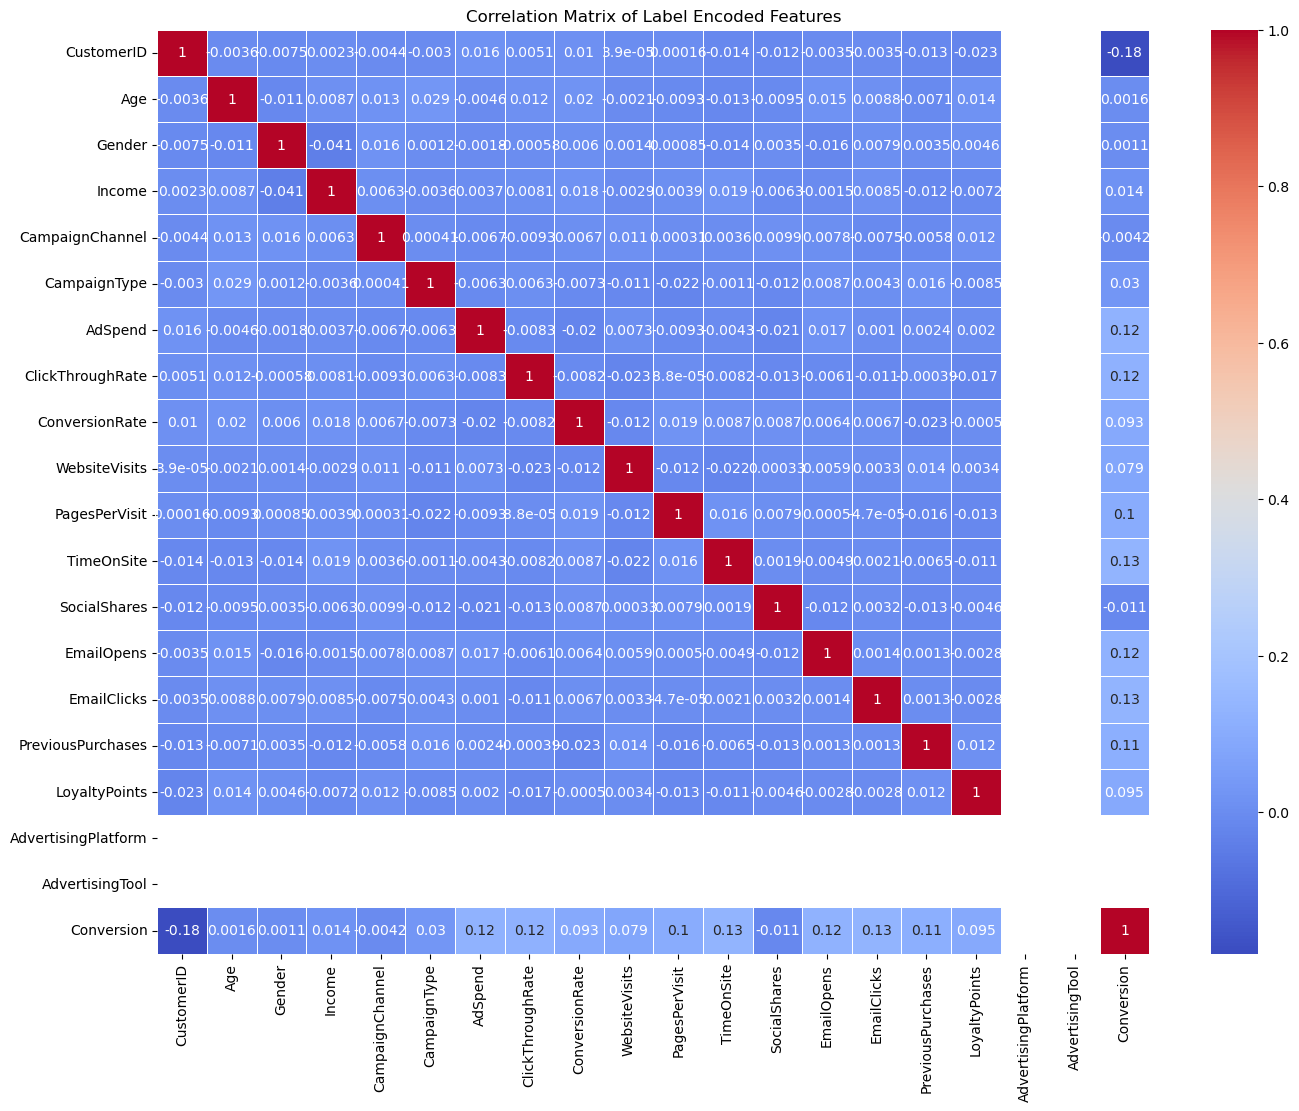

In [9]:
# Generate the correlation matrix for the encoded dataset
correlation_matrix = df_encoded.corr()

# Heatmap to visualize the correlation matrix
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Label Encoded Features')
plt.show()

Overall, we can see that the one with highest correlation(>10%) are AdSpend, ClickThroughRate, PagePerVisit, EmailOpens, EmailClicks and PreviousPurchase.
The Advertising Platform and Advertising Tool are blank for some reason. We will look at it in 1.3

## 1.3 Unique value for categorical columns

In [10]:
# Loop through each column in the dataset and print unique values
categorical_columns = data.select_dtypes(include=['object'])

for column in categorical_columns.columns:
    unique_values = data[column].unique()
    print(f"Column: {column}")
    print(f"Unique values: {unique_values}")
    print(f"Number of unique values: {len(unique_values)}\n")


Column: Gender
Unique values: ['Female' 'Male']
Number of unique values: 2

Column: CampaignChannel
Unique values: ['Social Media' 'Email' 'PPC' 'Referral' 'SEO']
Number of unique values: 5

Column: CampaignType
Unique values: ['Awareness' 'Retention' 'Conversion' 'Consideration']
Number of unique values: 4

Column: AdvertisingPlatform
Unique values: ['IsConfid']
Number of unique values: 1

Column: AdvertisingTool
Unique values: ['ToolConfid']
Number of unique values: 1



After reading the data note, I have realised that these columns are confidential and the unique value is one, hence, have no value for analysing and should be removed (step 2.1)
- AdvertisingPlatform: Platform where the ad was displayed (Confidential).
- AdvertisingTool: Specific tools used for advertising (Confidential).

# 1.4 Variables segmentations and analysis

### 1.4.1 Demographic Information
- Age, gender and income
- These variables can be used for customer segmentations.

#### 1.4.1.1 Age

Basic statistics of Age:
      count     mean        std   min   25%   50%   75%   max
Age  8000.0  43.6255  14.902785  18.0  31.0  43.0  56.0  69.0


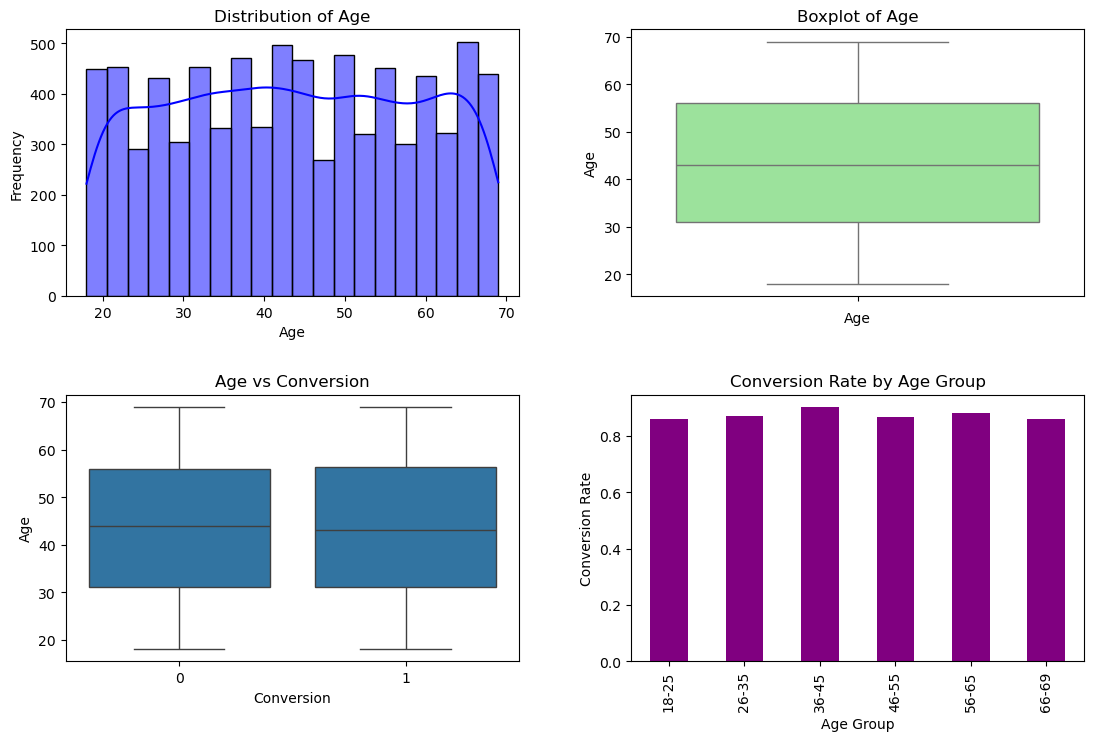

In [11]:
# Creating a figure with 2x2 grid for subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Adjust the layout to prevent overlap
plt.tight_layout(pad=5.0)

# 1. Basic statistics of Age
print("Basic statistics of Age:")
print(data['Age'].describe().to_frame().transpose())

# 2. Distribution of Age (Histogram and KDE)
sns.histplot(data['Age'], kde=True, bins=20, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# 3. Boxplot for Age to detect outliers
sns.boxplot(data['Age'], color='lightgreen', ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of Age')
axes[0, 1].set_xlabel('Age')

# 4. Relationship between Age and Conversion
sns.boxplot(x='Conversion', y='Age', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Age vs Conversion')
axes[1, 0].set_xlabel('Conversion')
axes[1, 0].set_ylabel('Age')

# 5. Grouping customers by Age and calculating the conversion rate per age group
age_bins = [18, 25, 35, 45, 55, 65, 69]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-69']
data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

# Calculate the conversion rate per AgeGroup
conversion_by_age = data.groupby('AgeGroup', observed=True)['Conversion'].mean()

# Bar plot for Conversion rate by Age Group
conversion_by_age.plot(kind='bar', color='purple', ax=axes[1, 1])
axes[1, 1].set_title('Conversion Rate by Age Group')
axes[1, 1].set_ylabel('Conversion Rate')
axes[1, 1].set_xlabel('Age Group')

plt.show()


The age variable shows no strong trend in terms of conversion likelihood, as conversion rates and distributions remain stable across different age ranges. Although age diversity exists in the dataset, it is not a key predictor of whether a customer will convert or not. This implies that further modeling should focus more on behavioral or engagement metrics rather than demographic factors like age.

#### 1.4.1.2 Gender

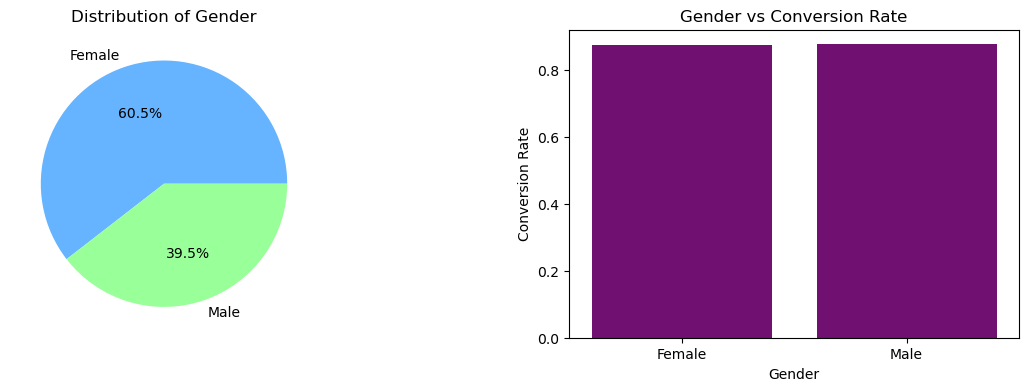

In [12]:
# Creating a figure with 1 row and 2 columns for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Adjust the spacing between subplots to center them better
fig.subplots_adjust(left=0.1, right=1, wspace=0.4)

# 1. Distribution of Gender (Pie Chart)
gender_counts = data['Gender'].value_counts()
axes[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#99ff99'])
axes[0].set_title('Distribution of Gender')

# 2. Gender vs Conversion (Bar plot to show conversion by gender)
sns.barplot(x='Gender', y='Conversion', data=data, color='purple', ax=axes[1], errorbar=None)
axes[1].set_title('Gender vs Conversion Rate')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Conversion Rate')

plt.show()


While there are more female customers in the dataset, gender does not play a significant role in conversion rates. Both genders exhibit similar conversion behaviors.

#### 1.4.1.3 Income

Basic statistics of Income:
         count     mean      std      min      25%      50%       75%  \
Income  8000.0  84664.0  37580.0  20014.0  51744.0  84926.0  116816.0   

             max  
Income  149986.0  


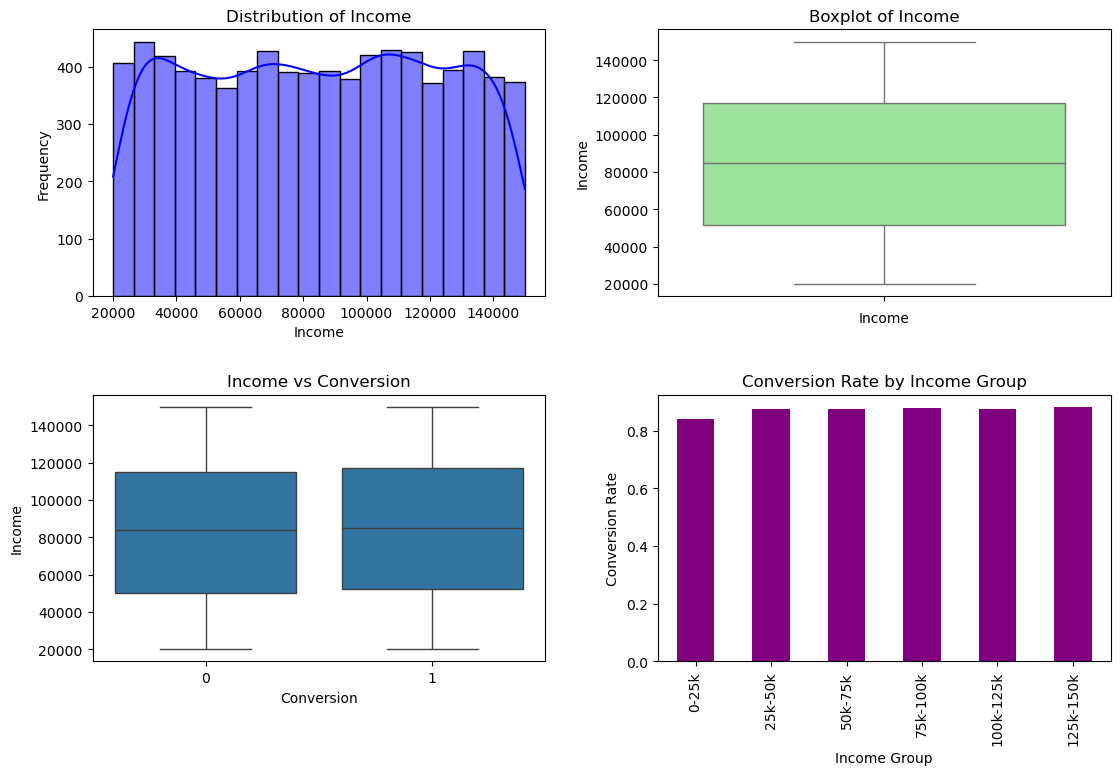

In [13]:
# Creating a figure with 2x2 grid for subplots for Income analysis
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Adjust the layout to prevent overlap
plt.tight_layout(pad=5.0)

# 1. Basic statistics of Income
print("Basic statistics of Income:")
income_stats = data['Income'].describe().to_frame().transpose().round()
print(income_stats)

# 2. Distribution of Income (Histogram and KDE)
sns.histplot(data['Income'], kde=True, bins=20, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Income')
axes[0, 0].set_xlabel('Income')
axes[0, 0].set_ylabel('Frequency')

# 3. Boxplot for Income to detect outliers
sns.boxplot(data['Income'], color='lightgreen', ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of Income')
axes[0, 1].set_xlabel('Income')

# 4. Relationship between Income and Conversion
sns.boxplot(x='Conversion', y='Income', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Income vs Conversion')
axes[1, 0].set_xlabel('Conversion')
axes[1, 0].set_ylabel('Income')

# 5. Grouping customers by Income and calculating the conversion rate per income group
income_bins = [0, 25000, 50000, 75000, 100000, 125000, 150000]
income_labels = ['0-25k', '25k-50k', '50k-75k', '75k-100k', '100k-125k', '125k-150k']
data['IncomeGroup'] = pd.cut(data['Income'], bins=income_bins, labels=income_labels)

# Calculate the conversion rate per IncomeGroup
conversion_by_income = data.groupby('IncomeGroup', observed=True)['Conversion'].mean()

# Bar plot for Conversion rate by Income Group
conversion_by_income.plot(kind='bar', color='purple', ax=axes[1, 1])
axes[1, 1].set_title('Conversion Rate by Income Group')
axes[1, 1].set_ylabel('Conversion Rate')
axes[1, 1].set_xlabel('Income Group')

plt.show()


Similarly, **income** does not have a significant impact on the conversion rate. However, we can observe a **weak positive correlation** between income and conversion rate. As income increases, the conversion rate tends to show a slight upward trend, as reflected in both the **box plot** and **histogram**. 

This suggests that while income may not be a primary driver of conversion, higher-income customers may have a marginally higher likelihood of converting.

### 1.4.2 Marketing-specific Variables
- CampaignType, CampaignChannel
- AdSpend, ClickThroughRate, ConversionRate
- These variables can be used to analyse the performance of the marketing campaign 


#### 1.4.2.1 CampaignChannel

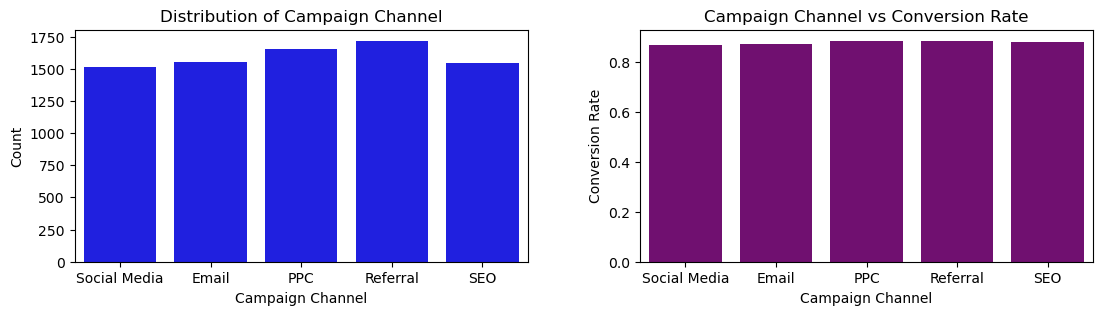

In [14]:
# Creating a figure with 1 row and 2 columns for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Adjust the layout to prevent overlap
plt.tight_layout(pad=5.0)

# 1. Distribution of CampaignChannel (Count Plot)
sns.countplot(x='CampaignChannel', data=data, color='blue', ax=axes[0])
axes[0].set_title('Distribution of Campaign Channel')
axes[0].set_xlabel('Campaign Channel')
axes[0].set_ylabel('Count')

# 2. CampaignChannel vs Conversion (Bar plot to show conversion by campaign channel)
sns.barplot(x='CampaignChannel', y='Conversion', data=data, color='purple', ax=axes[1], errorbar=None)
axes[1].set_title('Campaign Channel vs Conversion Rate')
axes[1].set_xlabel('Campaign Channel')
axes[1].set_ylabel('Conversion Rate')

plt.show()


- The most frequently used campaign channels are PPC (Pay-Per-Click) and Referral, with both channels having similar counts, followed closely by Email. SEO seems to be the least used campaign channel in comparison to the others.
- The conversion rates across all campaign channels appear very similar, hovering around 0.8 (80%). This suggests that all channels perform relatively well in terms of conversions, and there may not be a significant difference in conversion effectiveness between channels.



The conversion rates across all campaign channels appear very similar, hovering around 0.8 (80%). This suggests that all channels perform relatively well in terms of conversions, and there may not be a significant difference in conversion effectiveness between channels.


#### 1.4.2.2 CampaignType

Channel used for delivering the marketing campaign: Email, Social Media, SEO, PPC, Referral


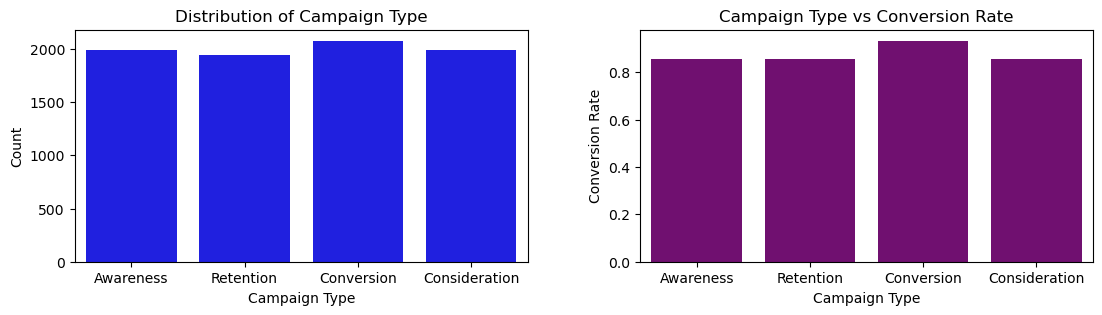

In [15]:
# Creating a figure with 1 row and 2 columns for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Adjust the layout to prevent overlap
plt.tight_layout(pad=5.0)

# 1. Distribution of CampaignType (Count Plot)
sns.countplot(x='CampaignType', data=data, color='blue', ax=axes[0])
axes[0].set_title('Distribution of Campaign Type')
axes[0].set_xlabel('Campaign Type')
axes[0].set_ylabel('Count')

# 2. CampaignType vs Conversion (Bar plot to show conversion by campaign type)
sns.barplot(x='CampaignType', y='Conversion', data=data, color='purple', ax=axes[1], errorbar=None)
axes[1].set_title('Campaign Type vs Conversion Rate')
axes[1].set_xlabel('Campaign Type')
axes[1].set_ylabel('Conversion Rate')

plt.show()


The distribution of campaign types is fairly even across the dataset, with similar counts for Awareness, Retention, Conversion, and Consideration campaigns. The even representation ensures that the analysis of each campaign type’s performance is not biased towards any particular type.

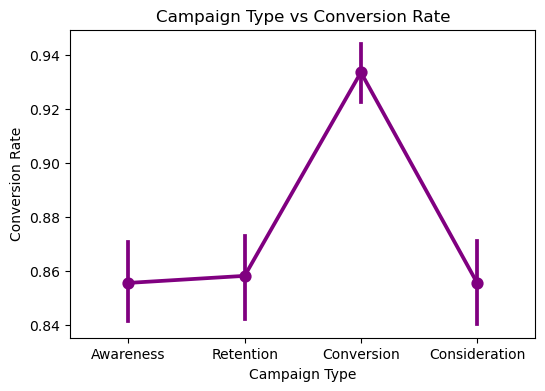

In [16]:
# Point plot for CampaignType vs Conversion
plt.figure(figsize=(6, 4))
sns.pointplot(x='CampaignType', y='Conversion', data=data, color='purple')
plt.title('Campaign Type vs Conversion Rate')
plt.xlabel('Campaign Type')
plt.ylabel('Conversion Rate')
plt.show()

The sharp peak in the Conversion campaign type confirms that these campaigns are the most successful at driving conversions. Retention, Awareness, and Consideration campaign types have similar conversion rates, fluctuating around 85%.



#### 1.4.2.3 AdSpend

Basic statistics of ClickThroughRate (rounded):
                   count  mean  std  min  25%  50%  75%  max
ClickThroughRate  8000.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0


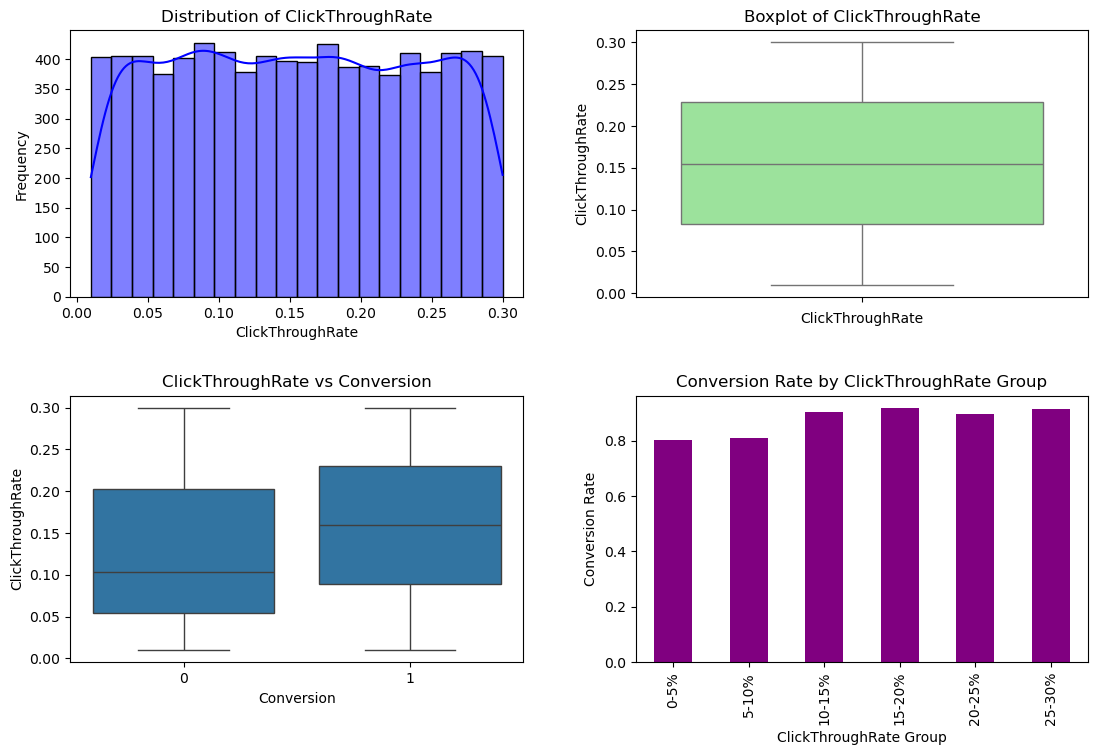

In [17]:
# Creating a figure with 2x2 grid for subplots for ClickThroughRate analysis
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Adjust the layout to prevent overlap
plt.tight_layout(pad=5.0)

# 1. Basic statistics of ClickThroughRate (rounded to 0 decimal places)
print("Basic statistics of ClickThroughRate (rounded):")
ctr_stats = data['ClickThroughRate'].describe().to_frame().transpose().round(0)
print(ctr_stats)

# 2. Distribution of ClickThroughRate (Histogram and KDE)
sns.histplot(data['ClickThroughRate'], kde=True, bins=20, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of ClickThroughRate')
axes[0, 0].set_xlabel('ClickThroughRate')
axes[0, 0].set_ylabel('Frequency')

# 3. Boxplot for ClickThroughRate to detect outliers
sns.boxplot(data['ClickThroughRate'], color='lightgreen', ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of ClickThroughRate')
axes[0, 1].set_xlabel('ClickThroughRate')

# 4. Relationship between ClickThroughRate and Conversion
sns.boxplot(x='Conversion', y='ClickThroughRate', data=data, ax=axes[1, 0])
axes[1, 0].set_title('ClickThroughRate vs Conversion')
axes[1, 0].set_xlabel('Conversion')
axes[1, 0].set_ylabel('ClickThroughRate')

# 5. Grouping customers by ClickThroughRate and calculating the conversion rate per ClickThroughRate group
ctr_bins = [0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35]
ctr_labels = ['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25-30%', '30-35%']
data['CTRGroup'] = pd.cut(data['ClickThroughRate'], bins=ctr_bins, labels=ctr_labels)

# Calculate the conversion rate per CTRGroup
conversion_by_ctr = data.groupby('CTRGroup', observed=True)['Conversion'].mean()

# Bar plot for Conversion rate by ClickThroughRate Group
conversion_by_ctr.plot(kind='bar', color='purple', ax=axes[1, 1])
axes[1, 1].set_title('Conversion Rate by ClickThroughRate Group')
axes[1, 1].set_ylabel('Conversion Rate')
axes[1, 1].set_xlabel('ClickThroughRate Group')

plt.show()


The Histogram and boxplot indicates that the median AdSpend is around $5,000, with a typical range between $3,000 and $7,500. There are no significant outliers, which suggests that most marketing campaigns have moderate spending.

The boxplot shows that customers who converted tended to have a higher average AdSpend compared to those who did not. This could indicate that campaigns with higher ad spending tend to result in more conversions.

- Interestingly, the conversion rate remains relatively high across all AdSpend groups, with a slight increase in conversion rates for higher spending groups (5k-7k and 7k-10k). 
- This suggests that increasing AdSpend may slightly improve conversion rates, though even lower spending campaigns perform well.

#### 1.4.2.4 CTR or ClickThroughRate
- Percentage of customers who clicked on the marketing content.

Basic statistics of ClickThroughRate (rounded):
                   count      mean       std       min       25%       50%  \
ClickThroughRate  8000.0  0.154829  0.084007  0.010005  0.082635  0.154505   

                       75%       max  
ClickThroughRate  0.228207  0.299968  


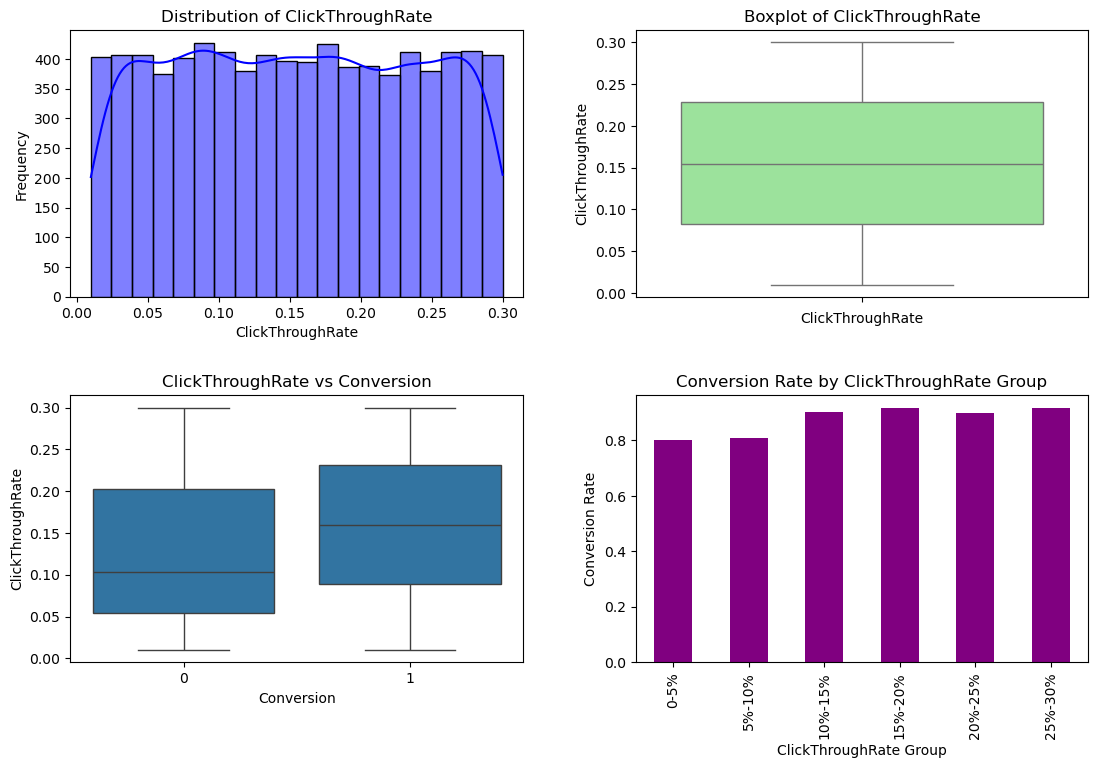

In [18]:
# Creating a figure with 2x2 grid for subplots for ClickThroughRate analysis
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Adjust the layout to prevent overlap
plt.tight_layout(pad=5.0)

# 1. Basic statistics of ClickThroughRate (rounded to 0 decimal places)
print("Basic statistics of ClickThroughRate (rounded):")
ctr_stats = data['ClickThroughRate'].describe().to_frame().transpose()
print(ctr_stats)

# 2. Distribution of ClickThroughRate (Histogram and KDE)
sns.histplot(data['ClickThroughRate'], kde=True, bins=20, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of ClickThroughRate')
axes[0, 0].set_xlabel('ClickThroughRate')
axes[0, 0].set_ylabel('Frequency')

# 3. Boxplot for ClickThroughRate to detect outliers
sns.boxplot(data['ClickThroughRate'], color='lightgreen', ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of ClickThroughRate')
axes[0, 1].set_xlabel('ClickThroughRate')

# 4. Relationship between ClickThroughRate and Conversion
sns.boxplot(x='Conversion', y='ClickThroughRate', data=data, ax=axes[1, 0])
axes[1, 0].set_title('ClickThroughRate vs Conversion')
axes[1, 0].set_xlabel('Conversion')
axes[1, 0].set_ylabel('ClickThroughRate')

# 5. Grouping customers by ClickThroughRate and calculating the conversion rate per ClickThroughRate group
ctr_bins = [0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30]
ctr_labels = ['0-5%', '5%-10%', '10%-15%', '15%-20%', '20%-25%', '25%-30%']
data['CTRGroup'] = pd.cut(data['ClickThroughRate'], bins=ctr_bins, labels=ctr_labels)

# Calculate the conversion rate per ClickThroughRate group
conversion_by_ctr = data.groupby('CTRGroup', observed=True)['Conversion'].mean()

# Bar plot for Conversion rate by ClickThroughRate Group
conversion_by_ctr.plot(kind='bar', color='purple', ax=axes[1, 1])
axes[1, 1].set_title('Conversion Rate by ClickThroughRate Group')
axes[1, 1].set_ylabel('Conversion Rate')
axes[1, 1].set_xlabel('ClickThroughRate Group')

# Display the full frame with subplots
plt.show()


- The distribution of CTR is fairly uniform between 0.00 and 0.30, with an interquartile range between 0.10 and 0.20.
- Campaigns with higher CTR (closer to 0.15-0.20) tend to result in more conversions, which is indicated by the higher box in the Conversion = 1 category. The bar plot shows that the 10-15% CTR group and the 15-20% CTR group have the highest conversion rates.


Explore Factors Influencing CTR: It might be useful to analyze which factors (e.g., campaign type, ad spend, or channel) most strongly influence higher CTR to optimize these areas.


#### 1.4.2.5 ConversionRate
- Percentage of clicks that converted into the desired action (e.g., purchases).

Basic statistics of ConversionRate (rounded):
                 count      mean       std       min      25%       50%  \
ConversionRate  8000.0  0.104389  0.054878  0.010018  0.05641  0.104046   

                     75%       max  
ConversionRate  0.152077  0.199995  


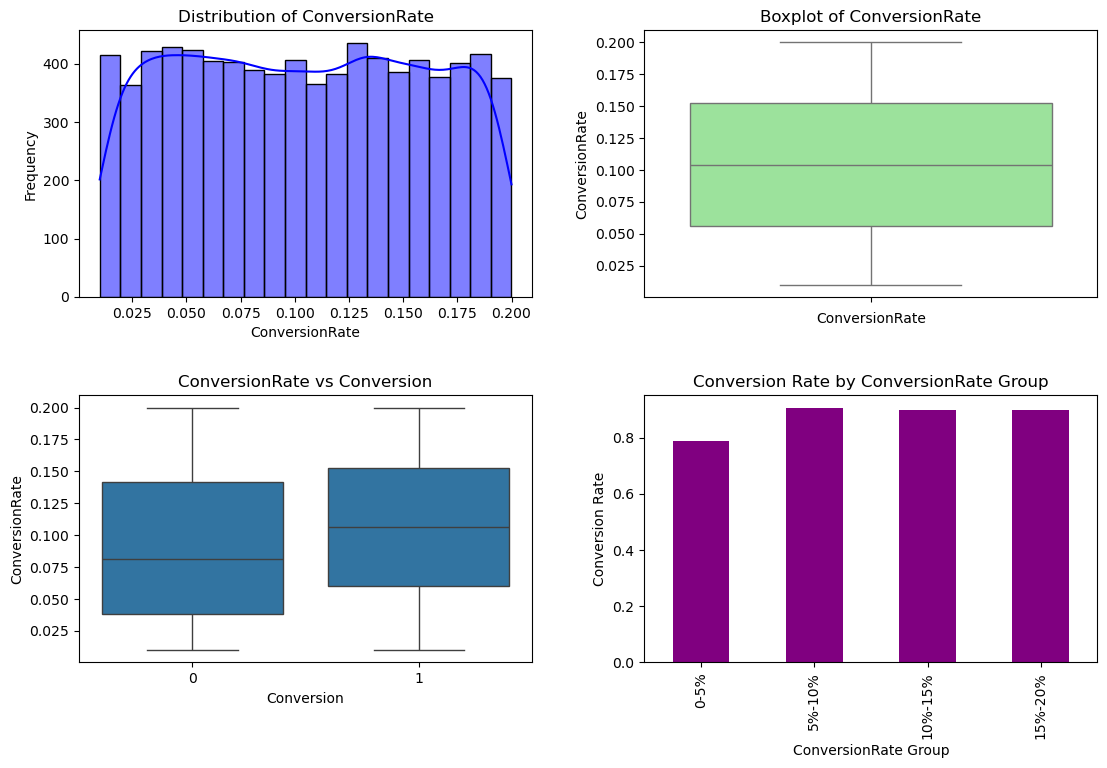

In [19]:
# Creating a figure with 2x2 grid for subplots for ConversionRate analysis
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Adjust the layout to prevent overlap
plt.tight_layout(pad=5.0)

# 1. Basic statistics of ConversionRate (rounded to 0 decimal places)
print("Basic statistics of ConversionRate (rounded):")
conversion_rate_stats = data['ConversionRate'].describe().to_frame().transpose()
print(conversion_rate_stats)

# 2. Distribution of ConversionRate (Histogram and KDE)
sns.histplot(data['ConversionRate'], kde=True, bins=20, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of ConversionRate')
axes[0, 0].set_xlabel('ConversionRate')
axes[0, 0].set_ylabel('Frequency')

# 3. Boxplot for ConversionRate to detect outliers
sns.boxplot(data['ConversionRate'], color='lightgreen', ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of ConversionRate')
axes[0, 1].set_xlabel('ConversionRate')

# 4. Relationship between ConversionRate and Conversion (if needed, though this can be redundant)
sns.boxplot(x='Conversion', y='ConversionRate', data=data, ax=axes[1, 0])
axes[1, 0].set_title('ConversionRate vs Conversion')
axes[1, 0].set_xlabel('Conversion')
axes[1, 0].set_ylabel('ConversionRate')

# 5. Grouping customers by ConversionRate and calculating the conversion rate per ConversionRate group
conversion_rate_bins = [0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30]
conversion_rate_labels = ['0-5%', '5%-10%', '10%-15%', '15%-20%', '20%-25%', '25%-30%']
data['ConversionRateGroup'] = pd.cut(data['ConversionRate'], bins=conversion_rate_bins, labels=conversion_rate_labels)

# Calculate the conversion rate per ConversionRate group
conversion_by_rate_group = data.groupby('ConversionRateGroup', observed=True)['Conversion'].mean()

# Bar plot for Conversion rate by ConversionRate Group
conversion_by_rate_group.plot(kind='bar', color='purple', ax=axes[1, 1])
axes[1, 1].set_title('Conversion Rate by ConversionRate Group')
axes[1, 1].set_ylabel('Conversion Rate')
axes[1, 1].set_xlabel('ConversionRate Group')

# Display the full frame with subplots
plt.show()


- The distribution of conversion rates shows that most campaigns have a conversion rate between 2.5% and 20%, with a fairly even spread across this range, with an interquartile range between 5% and 15%.

- This boxplot confirms that campaigns with higher conversion rates are more likely to lead to a conversion (labeled as 1). Campaigns with a higher median conversion rate tend to have more successful outcomes.

- Improving the conversion rate of underperforming campaigns to above 5% could yield the most impactful results, as there are diminishing returns when trying to increase conversion rates above 5-10% group.


### 1.4.3 Customer Engagement Variables
- Website Visits, PagesPerVisit, TimeOnSite, SocialShares, EmailOpens, EmailClick
- These variable provide valuable insights into how customers interact with the brand's digital platforms.

#### 1.4.3.1 WebsiteVisits
- Number of visits made by the customer to the website.

Basic statistics of WebsiteVisits:
                count  mean   std  min   25%   50%   75%   max
WebsiteVisits  8000.0  25.0  14.0  0.0  13.0  25.0  37.0  49.0


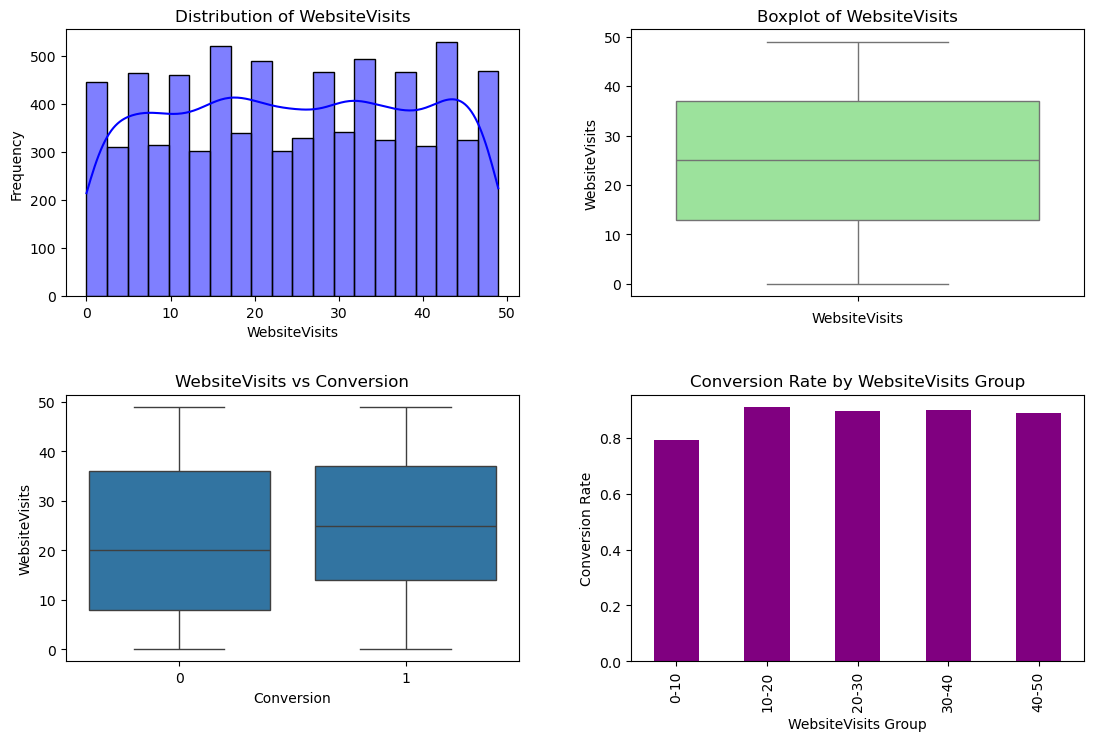

In [20]:
# Creating a figure with 2x2 grid for subplots for WebsiteVisits analysis
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Adjust the layout to prevent overlap
plt.tight_layout(pad=5.0)

# 1. Basic statistics of WebsiteVisits (rounded to nearest whole number)
print("Basic statistics of WebsiteVisits:")
website_visits_stats = data['WebsiteVisits'].describe().to_frame().transpose().round(0)
print(website_visits_stats)

# 2. Distribution of WebsiteVisits (Histogram and KDE)
sns.histplot(data['WebsiteVisits'], kde=True, bins=20, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of WebsiteVisits')
axes[0, 0].set_xlabel('WebsiteVisits')
axes[0, 0].set_ylabel('Frequency')

# 3. Boxplot for WebsiteVisits to detect outliers
sns.boxplot(data['WebsiteVisits'], color='lightgreen', ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of WebsiteVisits')
axes[0, 1].set_xlabel('WebsiteVisits')

# 4. Relationship between WebsiteVisits and Conversion
sns.boxplot(x='Conversion', y='WebsiteVisits', data=data, ax=axes[1, 0])
axes[1, 0].set_title('WebsiteVisits vs Conversion')
axes[1, 0].set_xlabel('Conversion')
axes[1, 0].set_ylabel('WebsiteVisits')

# 5. Grouping customers by WebsiteVisits and calculating the conversion rate per WebsiteVisits group
website_visits_bins = [0, 10, 20, 30, 40, 50, 100, 200]
website_visits_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-100', '100-200']
data['WebsiteVisitsGroup'] = pd.cut(data['WebsiteVisits'], bins=website_visits_bins, labels=website_visits_labels)

# Calculate the conversion rate per WebsiteVisitsGroup
conversion_by_visits = data.groupby('WebsiteVisitsGroup', observed=True)['Conversion'].mean()

# Bar plot for Conversion rate by WebsiteVisits Group
conversion_by_visits.plot(kind='bar', color='purple', ax=axes[1, 1])
axes[1, 1].set_title('Conversion Rate by WebsiteVisits Group')
axes[1, 1].set_ylabel('Conversion Rate')
axes[1, 1].set_xlabel('WebsiteVisits Group')

# Display the full frame with subplots
plt.show()




- The **distribution plot** shows that website visits are fairly evenly distributed between **0 and 50 visits**, with no significant spikes in any particular range. 
- The distribution and median of website visits for those who convert seems to be slightly higher than for those who do not, indicating a minor positive correlation between website visits and conversion.
- The bar plot shows a **positive trend** in conversion rates as the number of website visits increases. Customers who visit the website **10-20 times** have the highest conversion rate, closely followed by those with **20-30** and **30-40** visits. 


Interestingly, customers with fewer than **10 visits** have a notably lower conversion rate compared to other groups, suggesting that **frequent website visits** could improve the likelihood of conversion.
   - After **10 visits**, the conversion rate remains consistently high, indicating that once a customer reaches a certain level of engagement (around 10 visits or more), they are more likely to convert.

### Key Insight:
The number of **website visits** plays a moderate role in conversion, as customers who visit the website more frequently are more likely to convert. However, there is no significant difference between the higher frequency visit groups (10-50 visits), suggesting that after a certain point, additional visits may not increase the likelihood of conversion substantially. The focus should be on engaging customers early and getting them to return to the site multiple times, particularly beyond the first **10 visits**, to improve conversion rates.

#### 1.4.3.2 PagesPerVisit
- Average number of pages viewed per session

Basic statistics of PagesPerVisit:
                count  mean  std  min  25%  50%  75%   max
PagesPerVisit  8000.0   6.0  3.0  1.0  3.0  6.0  8.0  10.0


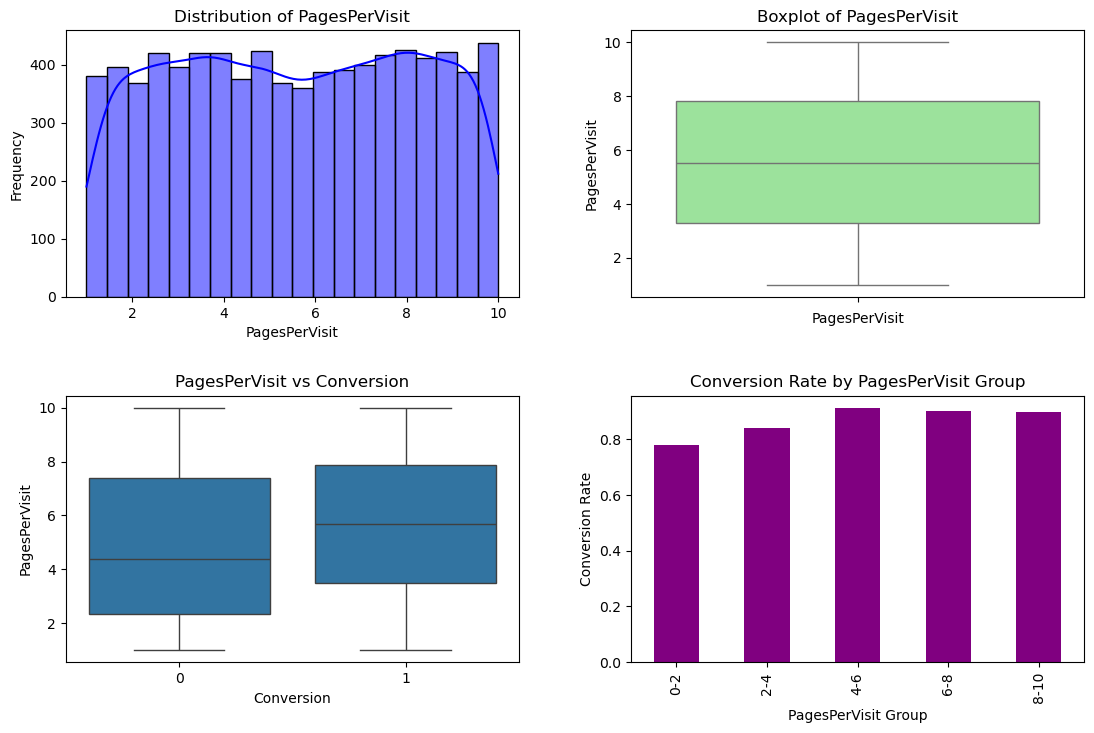

In [21]:
# Creating a figure with 2x2 grid for subplots for PagesPerVisit analysis
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Adjust the layout to prevent overlap
plt.tight_layout(pad=5.0)

# 1. Basic statistics of PagesPerVisit (rounded to nearest whole number)
print("Basic statistics of PagesPerVisit:")
pages_per_visit_stats = data['PagesPerVisit'].describe().to_frame().transpose().round(0)
print(pages_per_visit_stats)

# 2. Distribution of PagesPerVisit (Histogram and KDE)
sns.histplot(data['PagesPerVisit'], kde=True, bins=20, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of PagesPerVisit')
axes[0, 0].set_xlabel('PagesPerVisit')
axes[0, 0].set_ylabel('Frequency')

# 3. Boxplot for PagesPerVisit to detect outliers
sns.boxplot(data['PagesPerVisit'], color='lightgreen', ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of PagesPerVisit')
axes[0, 1].set_xlabel('PagesPerVisit')

# 4. Relationship between PagesPerVisit and Conversion
sns.boxplot(x='Conversion', y='PagesPerVisit', data=data, ax=axes[1, 0])
axes[1, 0].set_title('PagesPerVisit vs Conversion')
axes[1, 0].set_xlabel('Conversion')
axes[1, 0].set_ylabel('PagesPerVisit')

# 5. Grouping customers by PagesPerVisit and calculating the conversion rate per PagesPerVisit group
pages_per_visit_bins = [0, 2, 4, 6, 8, 10]
pages_per_visit_labels = ['0-2', '2-4', '4-6', '6-8', '8-10']
data['PagesPerVisitGroup'] = pd.cut(data['PagesPerVisit'], bins=pages_per_visit_bins, labels=pages_per_visit_labels)

# Calculate the conversion rate per PagesPerVisitGroup
conversion_by_pages = data.groupby('PagesPerVisitGroup', observed=True)['Conversion'].mean()

# Bar plot for Conversion rate by PagesPerVisit Group
conversion_by_pages.plot(kind='bar', color='purple', ax=axes[1, 1])
axes[1, 1].set_title('Conversion Rate by PagesPerVisit Group')
axes[1, 1].set_ylabel('Conversion Rate')
axes[1, 1].set_xlabel('PagesPerVisit Group')

# Display the full frame with subplots
plt.show()


#### 1.4.3.3 TimeOnSite
- Average time (in minutes) spent by the customer per visit.

Basic statistics of TimeOnSite:
             count  mean  std  min  25%  50%   75%   max
TimeOnSite  8000.0   8.0  4.0  1.0  4.0  8.0  11.0  15.0


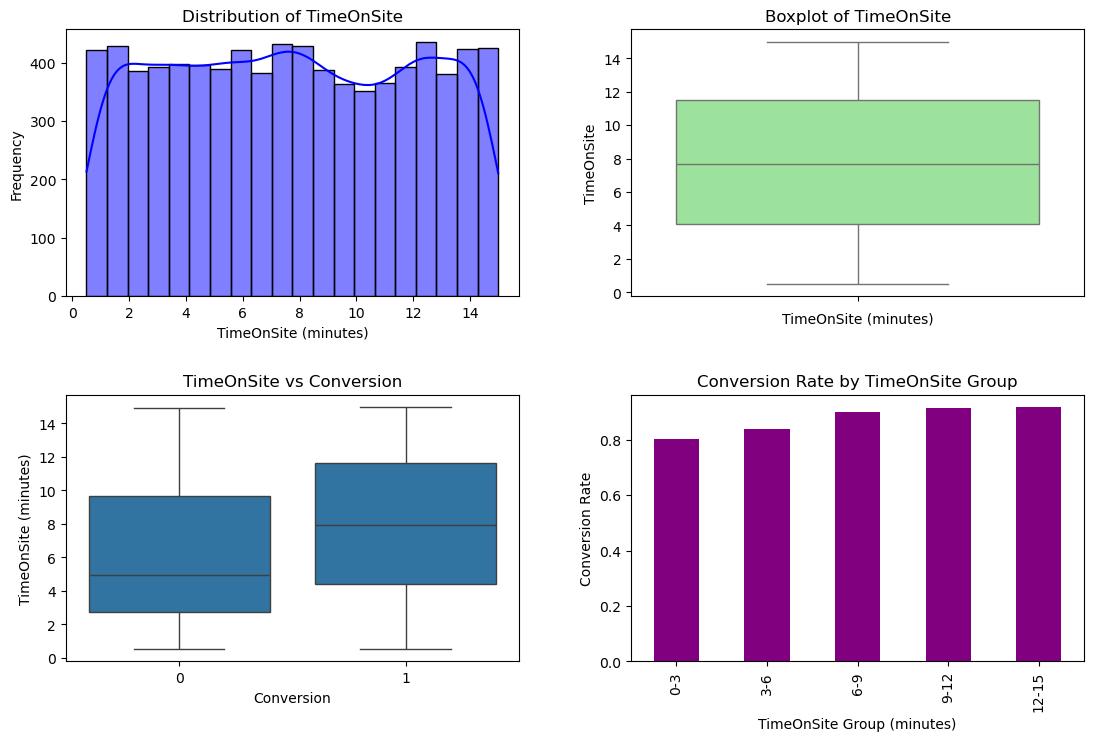

In [22]:
# Creating a figure with 2x2 grid for subplots for TimeOnSite analysis
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Adjust the layout to prevent overlap
plt.tight_layout(pad=5.0)

# 1. Basic statistics of TimeOnSite (rounded to nearest whole number)
print("Basic statistics of TimeOnSite:")
time_on_site_stats = data['TimeOnSite'].describe().to_frame().transpose().round(0)
print(time_on_site_stats)

# 2. Distribution of TimeOnSite (Histogram and KDE)
sns.histplot(data['TimeOnSite'], kde=True, bins=20, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of TimeOnSite')
axes[0, 0].set_xlabel('TimeOnSite (minutes)')
axes[0, 0].set_ylabel('Frequency')

# 3. Boxplot for TimeOnSite to detect outliers
sns.boxplot(data['TimeOnSite'], color='lightgreen', ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of TimeOnSite')
axes[0, 1].set_xlabel('TimeOnSite (minutes)')

# 4. Relationship between TimeOnSite and Conversion
sns.boxplot(x='Conversion', y='TimeOnSite', data=data, ax=axes[1, 0])
axes[1, 0].set_title('TimeOnSite vs Conversion')
axes[1, 0].set_xlabel('Conversion')
axes[1, 0].set_ylabel('TimeOnSite (minutes)')

# 5. Grouping customers by TimeOnSite and calculating the conversion rate per TimeOnSite group
time_on_site_bins = [0, 3, 6, 9, 12, 15]
time_on_site_labels = ['0-3', '3-6', '6-9', '9-12', '12-15']
data['TimeOnSiteGroup'] = pd.cut(data['TimeOnSite'], bins=time_on_site_bins, labels=time_on_site_labels)

# Calculate the conversion rate per TimeOnSiteGroup
conversion_by_time = data.groupby('TimeOnSiteGroup', observed=True)['Conversion'].mean()

# Bar plot for Conversion rate by TimeOnSite Group
conversion_by_time.plot(kind='bar', color='purple', ax=axes[1, 1])
axes[1, 1].set_title('Conversion Rate by TimeOnSite Group')
axes[1, 1].set_ylabel('Conversion Rate')
axes[1, 1].set_xlabel('TimeOnSite Group (minutes)')

# Display the full frame with subplots
plt.show()


#### 1.4.3.4 SocialShares
- Number of times the marketing content was shared on social media.

Basic statistics of SocialShares:
               count  mean   std  min   25%   50%   75%   max
SocialShares  8000.0  50.0  29.0  0.0  25.0  50.0  75.0  99.0


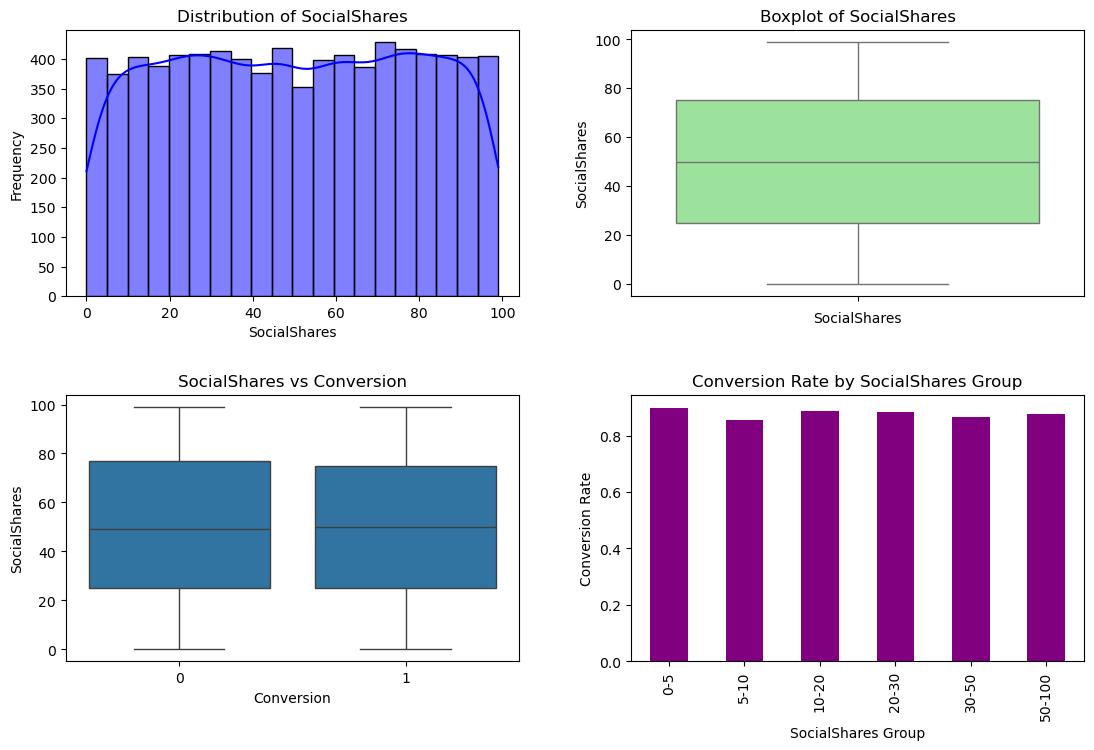

In [23]:
# Creating a figure with 2x2 grid for subplots for SocialShares analysis
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Adjust the layout to prevent overlap
plt.tight_layout(pad=5.0)

# 1. Basic statistics of SocialShares (rounded to nearest whole number)
print("Basic statistics of SocialShares:")
social_shares_stats = data['SocialShares'].describe().to_frame().transpose().round(0)
print(social_shares_stats)

# 2. Distribution of SocialShares (Histogram and KDE)
sns.histplot(data['SocialShares'], kde=True, bins=20, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of SocialShares')
axes[0, 0].set_xlabel('SocialShares')
axes[0, 0].set_ylabel('Frequency')

# 3. Boxplot for SocialShares to detect outliers
sns.boxplot(data['SocialShares'], color='lightgreen', ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of SocialShares')
axes[0, 1].set_xlabel('SocialShares')

# 4. Relationship between SocialShares and Conversion
sns.boxplot(x='Conversion', y='SocialShares', data=data, ax=axes[1, 0])
axes[1, 0].set_title('SocialShares vs Conversion')
axes[1, 0].set_xlabel('Conversion')
axes[1, 0].set_ylabel('SocialShares')

# 5. Grouping customers by SocialShares and calculating the conversion rate per SocialShares group
social_shares_bins = [0, 5, 10, 20, 30, 50, 100, 200]
social_shares_labels = ['0-5', '5-10', '10-20', '20-30', '30-50', '50-100', '100-200']
data['SocialSharesGroup'] = pd.cut(data['SocialShares'], bins=social_shares_bins, labels=social_shares_labels)

# Calculate the conversion rate per SocialSharesGroup
conversion_by_shares = data.groupby('SocialSharesGroup', observed=True)['Conversion'].mean()

# Bar plot for Conversion rate by SocialShares Group
conversion_by_shares.plot(kind='bar', color='purple', ax=axes[1, 1])
axes[1, 1].set_title('Conversion Rate by SocialShares Group')
axes[1, 1].set_ylabel('Conversion Rate')
axes[1, 1].set_xlabel('SocialShares Group')

# Display the full frame with subplots
plt.show()


#### 1.4.3.5 EmailOpens
- Number of times marketing emails were opened by the customer.

Basic statistics of EmailOpens:
             count  mean  std  min  25%  50%   75%   max
EmailOpens  8000.0   9.0  6.0  0.0  5.0  9.0  14.0  19.0


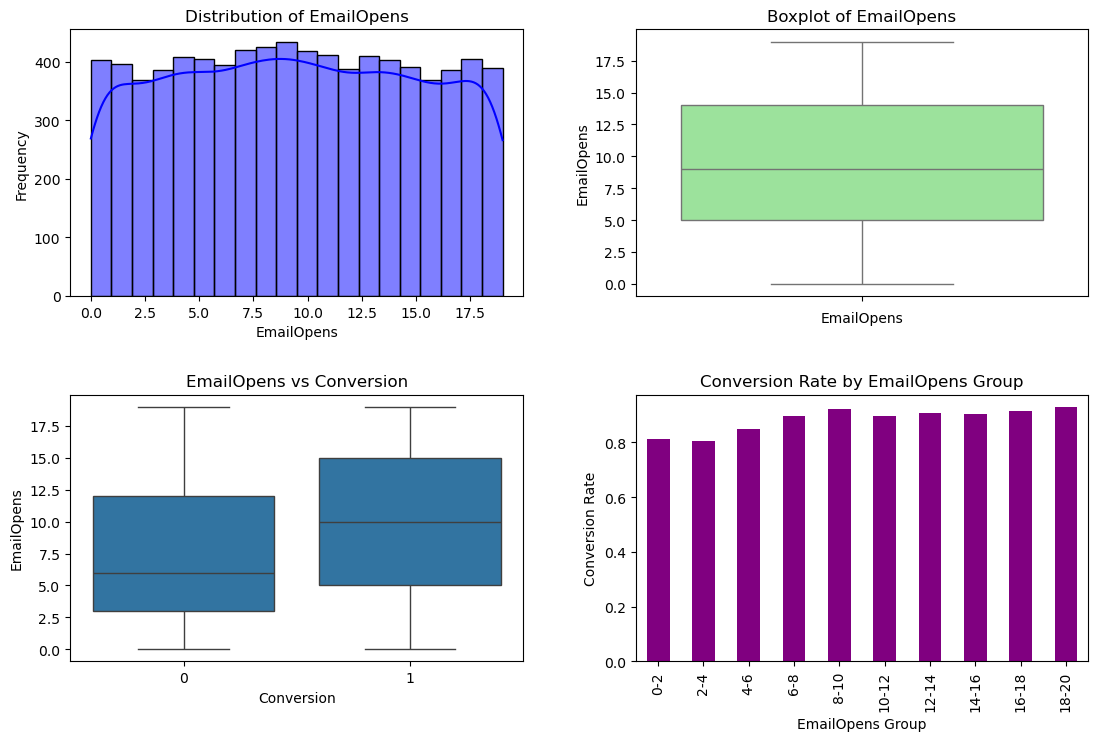

In [24]:
# Creating a figure with 2x2 grid for subplots for EmailOpens analysis
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Adjust the layout to prevent overlap
plt.tight_layout(pad=5.0)

# 1. Basic statistics of EmailOpens (rounded to nearest whole number)
print("Basic statistics of EmailOpens:")
email_opens_stats = data['EmailOpens'].describe().to_frame().transpose().round(0)
print(email_opens_stats)

# 2. Distribution of EmailOpens (Histogram and KDE)
sns.histplot(data['EmailOpens'], kde=True, bins=20, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of EmailOpens')
axes[0, 0].set_xlabel('EmailOpens')
axes[0, 0].set_ylabel('Frequency')

# 3. Boxplot for EmailOpens to detect outliers
sns.boxplot(data['EmailOpens'], color='lightgreen', ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of EmailOpens')
axes[0, 1].set_xlabel('EmailOpens')

# 4. Relationship between EmailOpens and Conversion
sns.boxplot(x='Conversion', y='EmailOpens', data=data, ax=axes[1, 0])
axes[1, 0].set_title('EmailOpens vs Conversion')
axes[1, 0].set_xlabel('Conversion')
axes[1, 0].set_ylabel('EmailOpens')

# 5. Grouping customers by EmailOpens and calculating the conversion rate per EmailOpens group
email_opens_bins = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
email_opens_labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '10-12', '12-14', '14-16', '16-18', '18-20']
data['EmailOpensGroup'] = pd.cut(data['EmailOpens'], bins=email_opens_bins, labels=email_opens_labels)

# Calculate the conversion rate per EmailOpensGroup
conversion_by_email_opens = data.groupby('EmailOpensGroup', observed=True)['Conversion'].mean()

# Bar plot for Conversion rate by EmailOpens Group
conversion_by_email_opens.plot(kind='bar', color='purple', ax=axes[1, 1])
axes[1, 1].set_title('Conversion Rate by EmailOpens Group')
axes[1, 1].set_ylabel('Conversion Rate')
axes[1, 1].set_xlabel('EmailOpens Group')

# Display the full frame with subplots
plt.show()


#### 1.4.3.6 EmailClicks
- Number of times links within marketing emails were clicked.

Basic statistics of EmailClicks:
              count  mean  std  min  25%  50%  75%  max
EmailClicks  8000.0   4.0  3.0  0.0  2.0  4.0  7.0  9.0


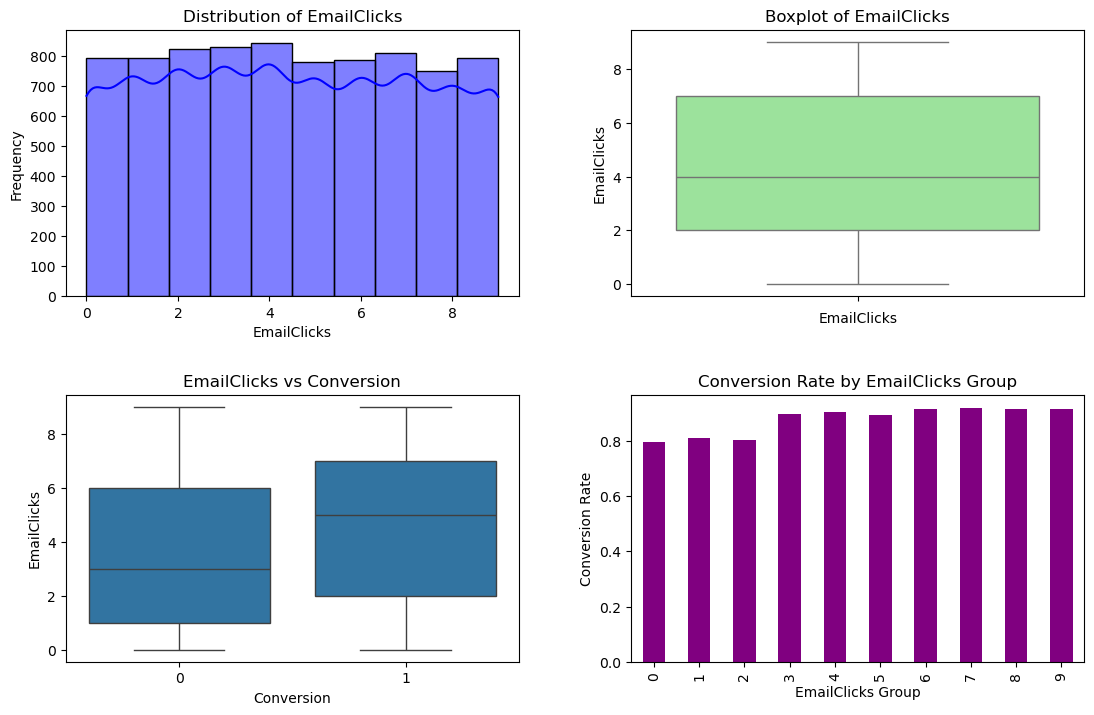

In [25]:
# Creating a figure with 2x2 grid for subplots for EmailClicks analysis
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Adjust the layout to prevent overlap
plt.tight_layout(pad=5.0)

# 1. Basic statistics of EmailClicks (rounded to nearest whole number)
print("Basic statistics of EmailClicks:")
email_clicks_stats = data['EmailClicks'].describe().to_frame().transpose().round(0)
print(email_clicks_stats)

# 2. Distribution of EmailClicks (Histogram and KDE)
sns.histplot(data['EmailClicks'], kde=True, bins=10, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of EmailClicks')
axes[0, 0].set_xlabel('EmailClicks')
axes[0, 0].set_ylabel('Frequency')

# 3. Boxplot for EmailClicks to detect outliers
sns.boxplot(data['EmailClicks'], color='lightgreen', ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of EmailClicks')
axes[0, 1].set_xlabel('EmailClicks')

# 4. Relationship between EmailClicks and Conversion
sns.boxplot(x='Conversion', y='EmailClicks', data=data, ax=axes[1, 0])
axes[1, 0].set_title('EmailClicks vs Conversion')
axes[1, 0].set_xlabel('Conversion')
axes[1, 0].set_ylabel('EmailClicks')

# 5. Grouping customers by EmailClicks and calculating the conversion rate per EmailClicks group
email_clicks_bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
email_clicks_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
data['EmailClicksGroup'] = pd.cut(data['EmailClicks'], bins=email_clicks_bins, labels=email_clicks_labels, right=False)

# Calculate the conversion rate per EmailClicksGroup
conversion_by_email_clicks = data.groupby('EmailClicksGroup', observed=True)['Conversion'].mean()

# Bar plot for Conversion rate by EmailClicks Group
conversion_by_email_clicks.plot(kind='bar', color='purple', ax=axes[1, 1])
axes[1, 1].set_title('Conversion Rate by EmailClicks Group')
axes[1, 1].set_ylabel('Conversion Rate')
axes[1, 1].set_xlabel('EmailClicks Group')

# Make the x-axis labels vertical on the subplot
axes[1, 1].tick_params(axis='x', rotation=90)

# Display the full frame with subplots
plt.show()


### 1.4.4 Historical Data

- PreviousPurchase and Loyalty can be analysed to see if the purchasing pattern have any influences on the conversion rate.

#### 1.4.4.1 PreviousPurchases
- Number of purchases the customer made before the current campaign.


Basic statistics of PreviousPurchases:
                    count  mean  std  min  25%  50%  75%  max
PreviousPurchases  8000.0   4.0  3.0  0.0  2.0  4.0  7.0  9.0


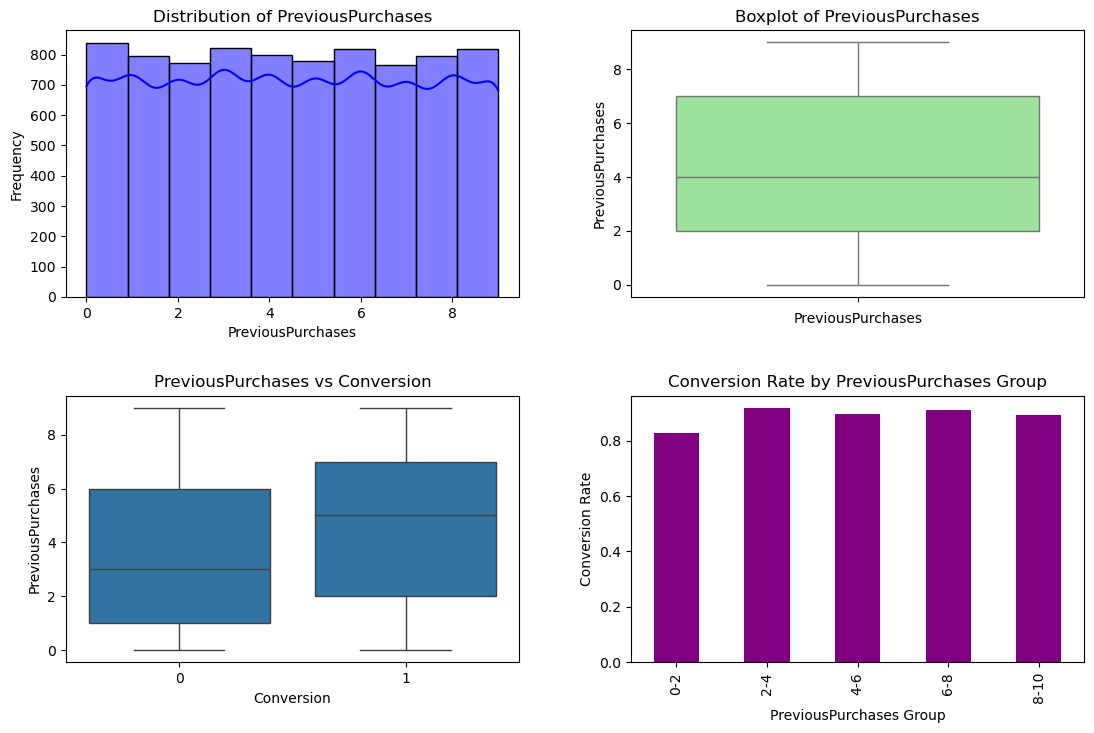

In [26]:
# Creating a figure with 2x2 grid for subplots for PreviousPurchases analysis
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Adjust the layout to prevent overlap
plt.tight_layout(pad=5.0)

# 1. Basic statistics of PreviousPurchases (rounded to nearest whole number)
print("Basic statistics of PreviousPurchases:")
previous_purchases_stats = data['PreviousPurchases'].describe().to_frame().transpose().round(0)
print(previous_purchases_stats)

# 2. Distribution of PreviousPurchases (Histogram and KDE)
sns.histplot(data['PreviousPurchases'], kde=True, bins=10, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of PreviousPurchases')
axes[0, 0].set_xlabel('PreviousPurchases')
axes[0, 0].set_ylabel('Frequency')

# 3. Boxplot for PreviousPurchases to detect outliers
sns.boxplot(data['PreviousPurchases'], color='lightgreen', ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of PreviousPurchases')
axes[0, 1].set_xlabel('PreviousPurchases')

# 4. Relationship between PreviousPurchases and Conversion
sns.boxplot(x='Conversion', y='PreviousPurchases', data=data, ax=axes[1, 0])
axes[1, 0].set_title('PreviousPurchases vs Conversion')
axes[1, 0].set_xlabel('Conversion')
axes[1, 0].set_ylabel('PreviousPurchases')

# 5. Grouping customers by PreviousPurchases and calculating the conversion rate per PreviousPurchases group
previous_purchases_bins = [0, 2, 4, 6, 8, 10]
previous_purchases_labels = ['0-2', '2-4', '4-6', '6-8', '8-10']
data['PreviousPurchasesGroup'] = pd.cut(data['PreviousPurchases'], bins=previous_purchases_bins, labels=previous_purchases_labels)

# Calculate the conversion rate per PreviousPurchasesGroup
conversion_by_previous_purchases = data.groupby('PreviousPurchasesGroup', observed=True)['Conversion'].mean()

# Bar plot for Conversion rate by PreviousPurchases Group
conversion_by_previous_purchases.plot(kind='bar', color='purple', ax=axes[1, 1])
axes[1, 1].set_title('Conversion Rate by PreviousPurchases Group')
axes[1, 1].set_ylabel('Conversion Rate')
axes[1, 1].set_xlabel('PreviousPurchases Group')

# Display the full frame with subplots
plt.show()


#### 1.4.4.2 LoyaltyPoints
- Loyalty points accumulated by the customer over time.

Basic statistics of LoyaltyPoints:
                count    mean     std  min     25%     50%     75%     max
LoyaltyPoints  8000.0  2490.0  1430.0  0.0  1255.0  2497.0  3702.0  4999.0


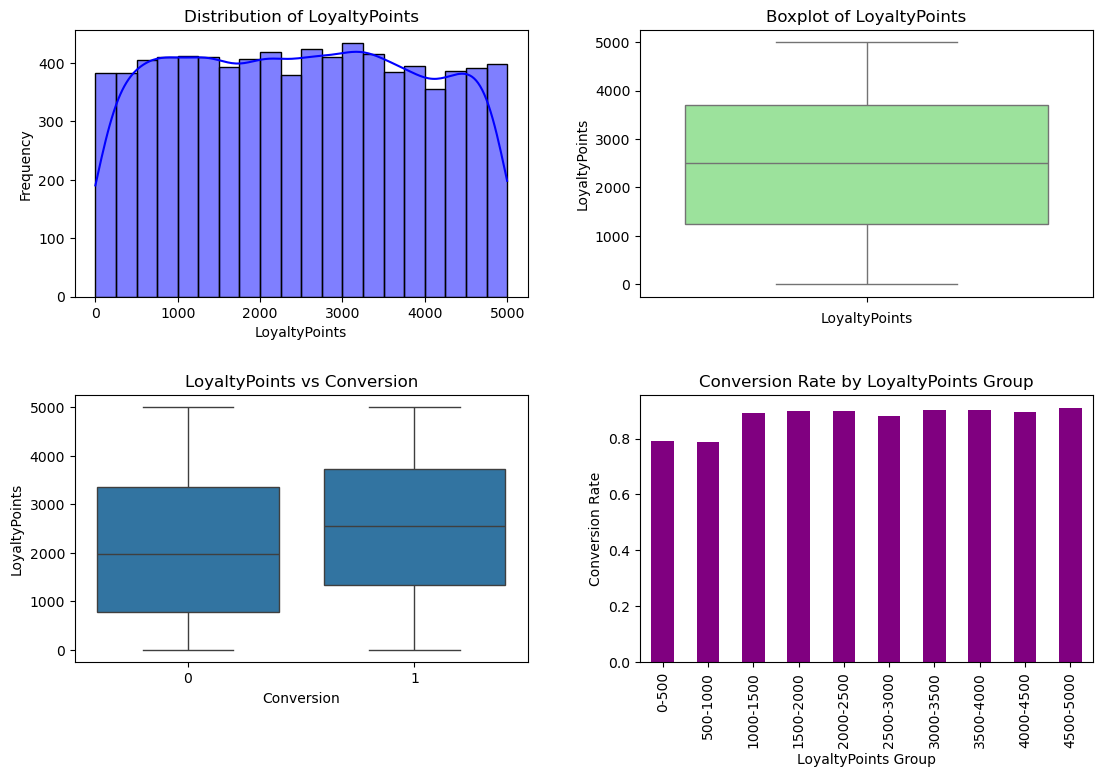

In [27]:
# Creating a figure with 2x2 grid for subplots for LoyaltyPoints analysis
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Adjust the layout to prevent overlap
plt.tight_layout(pad=5.0)

# 1. Basic statistics of LoyaltyPoints (rounded to nearest whole number)
print("Basic statistics of LoyaltyPoints:")
loyalty_points_stats = data['LoyaltyPoints'].describe().to_frame().transpose().round(0)
print(loyalty_points_stats)

# 2. Distribution of LoyaltyPoints (Histogram and KDE)
sns.histplot(data['LoyaltyPoints'], kde=True, bins=20, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of LoyaltyPoints')
axes[0, 0].set_xlabel('LoyaltyPoints')
axes[0, 0].set_ylabel('Frequency')

# 3. Boxplot for LoyaltyPoints to detect outliers
sns.boxplot(data['LoyaltyPoints'], color='lightgreen', ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of LoyaltyPoints')
axes[0, 1].set_xlabel('LoyaltyPoints')

# 4. Relationship between LoyaltyPoints and Conversion
sns.boxplot(x='Conversion', y='LoyaltyPoints', data=data, ax=axes[1, 0])
axes[1, 0].set_title('LoyaltyPoints vs Conversion')
axes[1, 0].set_xlabel('Conversion')
axes[1, 0].set_ylabel('LoyaltyPoints')

# 5. Grouping customers by LoyaltyPoints and calculating the conversion rate per LoyaltyPoints group
loyalty_points_bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
loyalty_points_labels = ['0-500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000', '3000-3500', '3500-4000', '4000-4500', '4500-5000']
data['LoyaltyPointsGroup'] = pd.cut(data['LoyaltyPoints'], bins=loyalty_points_bins, labels=loyalty_points_labels)

# Calculate the conversion rate per LoyaltyPointsGroup
conversion_by_loyalty_points = data.groupby('LoyaltyPointsGroup', observed=True)['Conversion'].mean()

# Bar plot for Conversion rate by LoyaltyPoints Group
conversion_by_loyalty_points.plot(kind='bar', color='purple', ax=axes[1, 1])
axes[1, 1].set_title('Conversion Rate by LoyaltyPoints Group')
axes[1, 1].set_ylabel('Conversion Rate')
axes[1, 1].set_xlabel('LoyaltyPoints Group')

# Display the full frame with subplots
plt.show()


### 1.4.5 Target Variable


- Conversion: Binary variable indicating whether the customer converted (1) or did not convert (0) as a result of the marketing campaign.


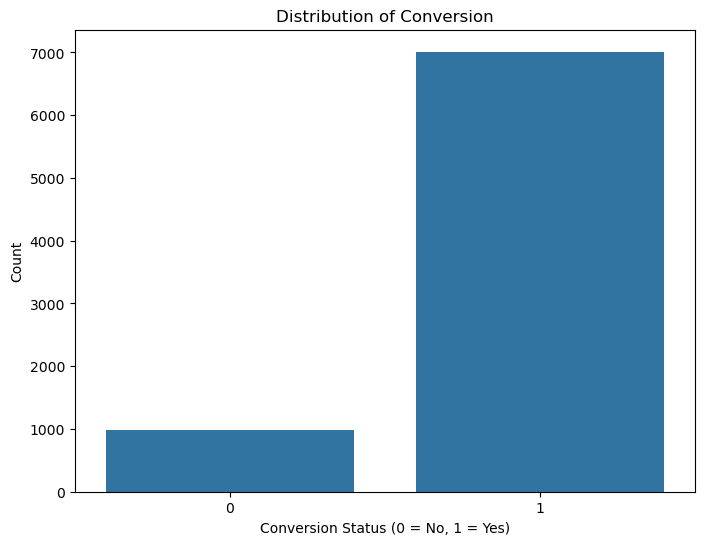

In [28]:
# Creating the countplot for Conversion
plt.figure(figsize=(8, 6))
sns.countplot(x='Conversion', data=data)
plt.title('Distribution of Conversion')
plt.xlabel('Conversion Status (0 = No, 1 = Yes)')
plt.ylabel('Count')

# Display the plot
plt.show()


# 2. Feature Engineering & Preprocessing

## 2.1 Remove unnecessary columns

In [29]:
# These columns are confidential, and the data is censored. Hence, drop the columns
data.drop(columns = ['AdvertisingPlatform','AdvertisingTool'], inplace = True)

In [30]:
# Drop the columns created before
data.drop(columns = ['AgeGroup','IncomeGroup', 'CTRGroup', 'ConversionRateGroup', 'WebsiteVisitsGroup','PagesPerVisitGroup', 'TimeOnSiteGroup',
                     'SocialSharesGroup','EmailOpensGroup', 'EmailClicksGroup', 'PreviousPurchasesGroup', 'LoyaltyPointsGroup'], inplace = True)

In [31]:
# This column will not be necessary for training 
data.drop(columns = ['CustomerID'], inplace = True)

In [32]:
data.head()

,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
0,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,1
1,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,1
2,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,1
3,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,1
4,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,1


# 3. Predictive Modeling

In this section, we aim to build and evaluate several machine learning models to predict customer conversions. The following steps outline the process for implementing predictive modeling:

**3.1 Data Splitting**: Before building models, the dataset is split into training and testing sets. 
- The training set is used to train the machine learning models, while the testing set is reserved for evaluating model performance on unseen data.

**3.2 Model Training**: Multiple machine learning algorithms are trained on the training dataset to explore different model performances. 
- Each model learns the underlying patterns and relationships between the input features and the target variable (Conversion).

**3.3 Model Evaluation**: After training, the models are tested on the unseen test set to assess their ability to generalize. 
- Performance metrics such as Accuracy, Precision, Recall, and F1-Score are calculated to compare the models.
- These metrics help to understand the balance between correct predictions and incorrect classifications, providing insights into which model performs best for this task.

**3.4 Model Selection**: The best model will be selected to further analyse and improve.

## 3.1 Label Encoding and Data Splitting

In [33]:
# One-Hot Encoding for categorical variables - 'X_encoded' are features, 'y' is the target variable (Conversion)
X_encoded = pd.get_dummies(data.drop('Conversion', axis=1))  # Encoding categorical variables
y = data['Conversion']  # Target variable

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [35]:
# check for distinct value
print(y_train.value_counts())
print(y_test.value_counts())

Conversion
1    5606
0     794
Name: count, dtype: int64
Conversion
1    1406
0     194
Name: count, dtype: int64


In [36]:
X_train.head()


,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,...,Gender_Male,CampaignChannel_Email,CampaignChannel_PPC,CampaignChannel_Referral,CampaignChannel_SEO,CampaignChannel_Social Media,CampaignType_Awareness,CampaignType_Consideration,CampaignType_Conversion,CampaignType_Retention
1467,61,93885,5689.175098,0.279867,0.159560,12,5.928037,0.649357,43,10,...,True,False,False,False,False,True,False,False,True,False
5768,36,132985,5424.122607,0.208562,0.101926,36,8.176488,14.470432,89,4,...,True,False,True,False,False,False,False,False,True,False
5714,19,108713,3927.956305,0.171735,0.085737,0,4.482721,11.193668,80,16,...,False,False,False,False,True,False,False,False,True,False
1578,56,58596,4292.600884,0.120824,0.061660,16,9.437501,7.128225,27,3,...,True,False,False,False,False,True,False,False,False,True
6958,54,58585,1103.799992,0.116697,0.038537,31,3.663657,0.631376,99,7,...,False,False,True,False,False,False,False,False,True,False


## 3.2 Design a function to perform Model Training and Evaluating

In [37]:
# Function to evaluate multiple models
def evaluate_models(X_train, X_test, y_train, y_test):
    
    # Suppress only ConvergenceWarnings
    warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

    # List of models to evaluate
    models = {
        'Logistic Regression': LogisticRegression(solver='saga', max_iter=5000, C=0.5),
        'Random Forest': RandomForestClassifier(),
        'Gradient Boosting': GradientBoostingClassifier(),
        'Support Vector Machine': SVC(),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'Naive Bayes': GaussianNB(),
        'AdaBoost': AdaBoostClassifier(algorithm='SAMME'),
        'Bagging Classifier': BaggingClassifier(),
        'Extra Trees': ExtraTreesClassifier(),
        'Linear Discriminant Analysis': LinearDiscriminantAnalysis()
    }
    
    # Initialize a list to store the results
    results_list = []
    
    # Loop through each model, train, and evaluate
    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted',  zero_division=1) # handle division by zero gracefully and 
                                                                     #set precision to 1 when no samples are predicted for a class
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        # Store the results in a dictionary
        results_list.append({
            'Model': name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1
        })
    
    # Convert the list of results to a DataFrame
    results = pd.DataFrame(results_list)
    
    # Sort the results by F1-Score (or any other metric)
    results = results.sort_values(by='F1-Score', ascending=False)
    
    # Display the results
    print(pd.DataFrame(results))

## 3.3 Run the model and evaluate the result

In [38]:
# Call the function to evaluate models with the split data
results = evaluate_models(X_train, X_test, y_train, y_test)

                           Model  Accuracy  Precision    Recall  F1-Score
2              Gradient Boosting  0.918125   0.913212  0.918125  0.904777
8             Bagging Classifier  0.897500   0.883634  0.897500  0.886365
7                       AdaBoost  0.901875   0.897061  0.901875  0.876210
1                  Random Forest  0.891250   0.883114  0.891250  0.855235
10  Linear Discriminant Analysis  0.886875   0.864015  0.886875  0.853720
5                  Decision Tree  0.835000   0.845010  0.835000  0.839723
6                    Naive Bayes  0.880000   0.850207  0.880000  0.828475
9                    Extra Trees  0.878750   0.833661  0.878750  0.824412
0            Logistic Regression  0.878750   0.893452  0.878750  0.822038
3         Support Vector Machine  0.878750   0.893452  0.878750  0.822038
4            K-Nearest Neighbors  0.863125   0.792715  0.863125  0.820230


Model #2 Gradient Boosting ranked first in F1-Score, maintaining a balance harmonic between Recall and Precision. Tree-based models (e.g., Gradient Boosting, Bagging Classifier, Decision Tree, and Random Forest) dominate the top ranks in terms of F1-Score and accuracy. These models tend to perform well in capturing non-linear relationships in the data. Ensemble learning methods show significant improvement over single models like Decision Trees or Logistic Regression, highlighting their robustness in handling complex data.




## 3.4 Best model analyse and improvement ideas

Let's analyse the performance of the best model, Gradient Boosting more carefully and see if there are any area of improvements

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.40      0.54       194
           1       0.92      0.99      0.96      1406

    accuracy                           0.92      1600
   macro avg       0.88      0.69      0.75      1600
weighted avg       0.91      0.92      0.90      1600

F1 Score (Weighted): 0.9048


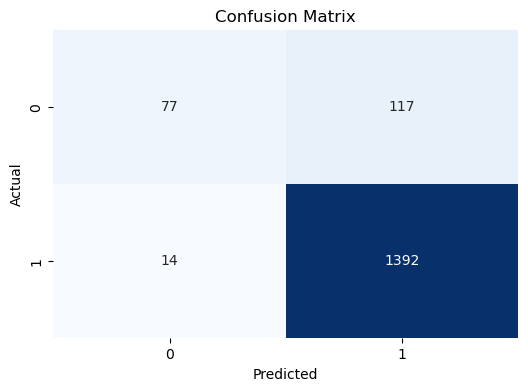

In [43]:
# Train the GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for ROC curve

# 1. Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Calculate the weighted F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score (Weighted): {f1:.4f}")

# 2. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Class 0 (Non-Conversions)**:
- Precision (0.85): Of all the instances predicted as class 0 (non-conversions), 85% were correctly classified.
- Recall (0.40): The model correctly identified 40% of the actual class 0 instances.
- F1-Score (0.54): The harmonic mean of precision and recall for class 0 is 0.54, indicating moderate performance in identifying non-conversions.

**Class 1 (Conversions)**:
- Precision (0.92): The model is very precise when predicting class 1 (conversions), with 92% of predictions being correct.
- Recall (0.99): The model successfully identified 99% of all actual conversions.
- F1-Score (0.96): The F1-score for class 1 is very high at 0.96, indicating that the model is highly effective in classifying conversions.


The model performs much better on class 1 (conversions) than class 0 (non-conversions), which is likely due to the class imbalance in the dataset (only 194 instances of class 0 vs 1406 instances of class 1). This could lead to the model favoring predictions for the majority class (conversions), leading to poor recall for the minority class (non-conversions).

Regardless, since our main goal is to **predict conversions (class 1)** accurately, the model's strong performance in classifying **class 1** is acceptable and aligns with the business objectives. The high **F1-score** of 0.96 for conversions shows that the model is both precise and effective at identifying true conversions, which is crucial for maximizing the impact of marketing efforts.

Although the model's performance for non-conversions (class 0) is weaker, this is less of a concern since false negatives (missing out on identifying non-conversions) have a smaller business impact compared to false positives (misclassifying conversions). Therefore, while improvements could be made to balance class performance, the current model already performs well in achieving the primary goal of accurately predicting customer conversions.

If a more balanced approach is desired, strategies like **adjusting the decision threshold** or **using class weighting** can be applied to further refine the model’s performance.



## 3.5 Model feature importances

/var/folders/s5/yjzt_0752f3_4zc69pnv4j700000gn/T/ipykernel_42608/1655619679.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


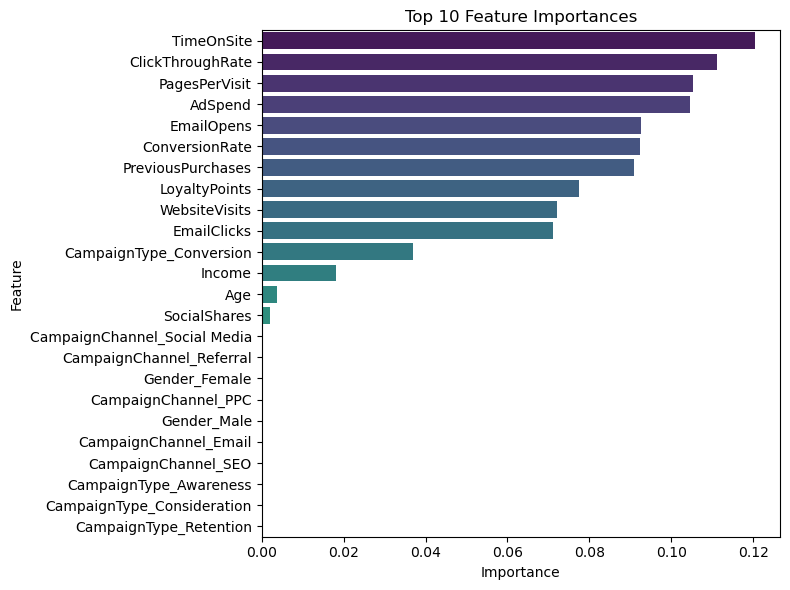

In [65]:
# Get feature importances and create a DataFrame
importances = model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort by importance and select the top 10 features
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot using Seaborn barplot for simplicity
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()


In [85]:
importance_df[importance_df['Importance'] > 0.01].round(2).transpose()

,7,3,6,2,9,4,11,12,5,10,22,1
Feature,TimeOnSite,ClickThroughRate,PagesPerVisit,AdSpend,EmailOpens,ConversionRate,PreviousPurchases,LoyaltyPoints,WebsiteVisits,EmailClicks,CampaignType_Conversion,Income
Importance,0.12,0.11,0.11,0.1,0.09,0.09,0.09,0.08,0.07,0.07,0.04,0.02


# 4. Improving the Gradient Boosting Model

In this section, we will explore strategies to enhance the performance of the **Gradient Boosting Classifier**, which has already shown strong results. By fine-tuning the model and addressing potential limitations, we aim to further improve its predictive power and accuracy.

### Potential Improvements:
1. **Hyperparameter Tuning**: Using techniques like **GridSearchCV** or **RandomizedSearchCV** to find optimal values for key hyperparameters (e.g., learning rate, number of estimators, maximum depth).
2. **Handling Class Imbalance**: Given the imbalance in the dataset (more conversions than non-conversions), techniques like **SMOTE** (Synthetic Minority Over-sampling Technique) or **class weighting** can help improve predictions for the minority class.
3. **Regularization**: Applying regularization techniques like **shrinkage** or **early stopping** to prevent overfitting and improve the model's generalization on unseen data.

These strategies will help fine-tune the model, making it more robust and better suited for accurate conversion predictions.

## 4.1 Hyperparameter Tuning
Hyperparameter tuning can help optimize the performance of the model by finding the best combination of parameters. Here, we use GridSearchCV to search for the optimal hyperparameters for the Gradient Boosting model.

In [88]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}

# Initialize the model
gb = GradientBoostingClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, scoring='f1_weighted', cv=5, verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters: ", grid_search.best_params_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters:  {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}


Apply the best parameter and analyse the performance

In [40]:
# Initialize the Gradient Boosting Classifier with the best parameters
best_gb_model = GradientBoostingClassifier(learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8)

# Fit the model to the training data and make prediction on test data
best_gb_model.fit(X_train, y_train)
y_pred = best_gb_model.predict(X_test)

# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate the weighted F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score (Weighted): {f1:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.47      0.60       194
           1       0.93      0.99      0.96      1406

    accuracy                           0.93      1600
   macro avg       0.89      0.73      0.78      1600
weighted avg       0.92      0.93      0.92      1600

F1 Score (Weighted): 0.9154


Overall, the F1 Score increased from 0.9048 to 0.9154. Specifically:
- The **precision** for **class 1 (conversions)** has slightly improved, while the **recall** — the more important metric — has been maintained. 
- The **recall for class 0 (non-conversions)** has increased significantly from **0.40 to 0.47**, indicating that the model is better at identifying non-conversions. The **precision** for class 0 has decreased slightly to **0.84**, a small trade-off in correctly predicting non-conversions. 

Despite this, the improvement in recall for class 0 is beneficial, as correctly identifying non-conversions is valuable for optimizing campaign strategies and minimizing false positives.

## 4.2 Handling Class Imbalance
Given the imbalance in the dataset (more conversions than non-conversions), we can address this using SMOTE (Synthetic Minority Over-sampling Technique) or by adjusting class weights in the Gradient Boosting model.



In [60]:
y_train.value_counts()

Conversion
1    5606
0     794
Name: count, dtype: int64

Given that **class 1 (conversions)** has **5606 instances** and **class 0 (non-conversions)** has **794 instances**, we can adjust the class weights proportionally to address this imbalance. To ensure that the model pays more attention to the minority class (class 0), the weight for class 0 should be higher than that for class 1.

To compute the weights, we can set the weight for each class inversely proportional to its frequency:
- Weight for class 1 = class 1 count/class 0 count = 5606/794 ≈ 7.06
- Weight for class 0 = class 0 count/class 1 count = 794/5606 ≈ 0.14


In this code, we address the **class imbalance** by manually adjusting the **sample weights** for the Gradient Boosting model.  We calculate the weights based on the inverse of the class frequencies. Specifically, class 0 receives approximately **7 times** more weight than class 1. This adjustment compensates for the class imbalance and improves the model's ability to correctly identify the minority class.




### Reinitialize the Gradient Boosting model with adjusted class weights
- Note: GradientBoostingClassifier does not directly support class weights, but can adjust sample weights


In [63]:

# Calculate class weights based on the class distribution
class_weights = {0: 7.06, 1: 0.14}  # Adjusted based on the inverse of class frequencies

# Assign sample weights to each instance
sample_weights = np.where(y_train == 0, class_weights[0], class_weights[1])

# Initialize the Gradient Boosting model
gb_with_weights = GradientBoostingClassifier(learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8)

# Fit the model with the sample weights
gb_with_weights.fit(X_train, y_train, sample_weight=sample_weights)

# Make predictions on the test set
y_pred = gb_with_weights.predict(X_test)

# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Evaluate the model
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score (weighted): {f1:4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.15      0.89      0.26       194
           1       0.95      0.30      0.45      1406

    accuracy                           0.37      1600
   macro avg       0.55      0.59      0.35      1600
weighted avg       0.85      0.37      0.43      1600

F1 Score (weighted): 0.429137


This approach improves the **recall for class 0** (non-conversions) to **0.89**, but the **precision remains low** at **0.15**. More importantly, the **recall for class 1** (conversions) drops drastically from **0.99 to 0.30**, which is not justified. The significant loss in class 1 performance makes this method less effective, especially since predicting conversions is the primary goal.

## 4.3 Regularization
Regularization techniques like **early stopping** or **shrinkage** can help prevent overfitting by limiting the model's complexity. Shrinkage reduces the contribution of each tree, while early stopping terminates the training if the model's performance on validation data stops improving.

In [59]:
# Reinitialize the Gradient Boosting model with early stopping
gb_with_early_stopping = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, 
                                                    subsample=0.8, validation_fraction=0.2, n_iter_no_change=10)

# Fit the model
gb_with_early_stopping.fit(X_train, y_train)

# Evaluate the model
y_pred = gb_with_early_stopping.predict(X_test)


# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score (weighted): {f1:4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.39      0.53       194
           1       0.92      0.99      0.95      1406

    accuracy                           0.92      1600
   macro avg       0.87      0.69      0.74      1600
weighted avg       0.91      0.92      0.90      1600

F1 Score (weighted): 0.901869


This does not have much impact !

# Section 5: Final Model and Key Insights


In this section, we finalize the **Gradient Boosting Model** by keeping the best parameters identified in **Section 4.1**. These parameters were optimized to balance the trade-offs between precision and recall:

- **Learning Rate**: 0.05
- **Max Depth**: 3
- **Number of Estimators**: 300
- **Subsample**: 0.8
